Authors: Helena Sofía Yaben Lopezosa and Pablo Laso-Mielgo.

p.laso.2017@alumnos.urjc.es

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [76]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.model_selection import validation_curve

In [77]:
#Yellowbrick
#from yellowbrick.model_selection import FeatureImportances
#from yellowbrick.style import set_palette

In [78]:
!pip install lime

In [79]:
#LIME
import lime
from lime import lime_tabular

In [80]:
#Feature Selection
#f_regression
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

In [81]:
import warnings
warnings.filterwarnings("ignore")

## <font color ="black">Breast Cancer Wisconsin (Diagnostic) Data Set</font>

Index:
1. [**Presentation of the problem**](#presentation)<br>
    1.1 [**Source of the dataset**](#source)<br>
    1.2 [**Dataset Information**](#information)<br>
    1.3 [**Motivation**](#motivation)<br>
2. [**Descriptive Analysis of the Database**](#EDA)<br>
3. [**Pre-processing of the database**](#Pre)<br>
4. [**Supervised or Unsupervised Learning**](#Modelling)<br>
5. [**Feature Selection and Extraction**](#Feature)<br>
6. [**Final Model Selection**](#final)<br>
6. [**Conclusion**](#Conclusionf)<br>
    
<a id='presentation'></a>
## <span style="color:darkslateblue">1. Presentation of the problem </span>
We are glad to introduce you our **final project** about the [**Breast Cancer Wisconsin (Diagnostic) Data Set**](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29). In this notebook we will cover the topics seen during the course, trying to get a deeper insight into the field of Artificial Intelligence.  
<a id='source'></a>
### <span style="color:slateblue">1.1 Source of the dataset </span>
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)


Creators: 

1. Dr. William H. Wolberg, General Surgery Dept. 
University of Wisconsin, Clinical Sciences Center 
Madison, WI 53792 
wolberg '@' eagle.surgery.wisc.edu 

2. W. Nick Street, Computer Sciences Dept. 
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706 
street '@' cs.wisc.edu 608-262-6619 

3. Olvi L. Mangasarian, Computer Sciences Dept. 
University of Wisconsin, 1210 West Dayton St., Madison, WI 53706 
olvi '@' cs.wisc.edu 

Donor: 

Nick Street

<a id='information'></a>
### <span style="color:slateblue">1.2 Dataset Information </span>

In this dataset, features are computed from a digitized image of a **Fine Needle Aspirate (FNA)** of **a breast mass**. These features describe characteristics of the **cell nuclei** present in the image. Data is obtained from both malignant and benignant masses, and instances are respectively labeled.

Each instance has **32 attributes**. First:

- **ID Number**
- **Diagnosis (target variable/label)**

The, ten real-valued features are computed **for each cell nucleus**:
1. **Radius** (mean of distances from center to points on the perimeter)
2. **Texture** (standard deviation of gray-scale values)
3. **Perimeter**
4. **Area**
5. **Smoothness** (local variation in radius lengths)
6. **Compactness** (perimeter $^{2}$/ area - 1.0)
7. **Concavity** (severity of concave portions of the contour)
8. **Concave points** (number of concave portions of the contour)
9. **Symmetry**
10. **Fractal dimension** (“coastline approximation” - 1)

The **mean**, **standard error** and **worst or largest (mean of the three largest values)** of these features were computed for each of the **569 samples**, resulting in **30 features**. 

The **objective of the analysis** of this dataset is to **determine whether or not a tissue correspond to a malignant or benignant breast mass** depending on its nuclei characteristics.
<br>

<img src=https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2013/11/15/17/36/ds00982_-ds01069_-ds01071_-wo00031_im00808_mcdc7_fine_needle_aspirationthu_jpg.jpg width="300">

<img src=https://static.packt-cdn.com/products/9781783980284/graphics/3a298fcc-54fb-42c2-a212-52823e709e30.png width =700>

<br>

<a id='motivation'></a>
### <span style="color:slateblue"> 1.3 Motivation</span>
Breast cancer is a group of diseases in which cells in breast tissue change and divide uncontrolled, typically resulting in a lump or mass. It can be developed in both men and women, although the former type is rare. It is the **most common type of cancer among women across the world**. Moreover, it has been estimated that this type of cancer accounts for 1 in 4 cancer cases for females, being the leading cause of death from cancer in women.

**Biopsy of breast tissue is one of the tests implied in the diagnosis of breast cancer and constitutes the most effective way to distinguish betweeen malignant and benignant tissue**. In concrete, the hystopathological analysis of the nuclei can be deterministic in the diagnosis since, typically, the nucleus of a cancer cell shows characteristic features related to size, shape and texture. Usually, nuclei become enlarged and darker, and with irregular outline. 

The **complex nature of breast cancer** require careful stratification of patients in order to provide a **tailored and efficient therapy**, a process where histopathologic analysis plays an important role. The **interpretation of pathology slides** often require sophisticated, bulky and expensive technologies, as well as highly trained professionals. The **digitalization of pathology slides** and the [**increasing use of AI-based algorithms on hystopathological data**](https://www.researchgate.net/publication/338061470_Artificial_Intelligence_in_Digital_Breast_Pathology_Techniques_and_Applications)  have allowed to improve accuracy of current diagnosis techniques, as well as to reduce costs, interpretation time and help trained pathologists to improve their analysis.

<br>
<img src=https://miro.medium.com/max/5092/1*UZAH2-y4BfpxhTZbe7mR6A.png width = 1000>

<br>

Models have also been widely applied to [**mammography**](https://scitechdaily.com/new-artificial-intelligence-tool-improves-breast-cancer-detection-on-mammography/) to help radiologists **detecting abnormalities** that may be associated to breast cancer, which may also help in **cancer staging**. 

<br>
<img src=https://news.mit.edu/sites/default/files/images/201905/BreastCancerAI.png width = 600>


<br>

<a id='EDA'></a>
## <span style="color:darkslateblue"> 2. Descriptive Analysis of the Dataset</span>

Once data is acquired, after ensuring its quality is optimal for data analysis, a deep exploration before pre-processing must be performed to better understand the data and be able to perform a proper pre-processing and modelling. This is what is called **Exploratory Data Analysis (EDA)**.

Understanding the dataset implies several issues:
1. Get information about data types, shape of the dataset and descriptive metrics.
2. Extract information about the relevancy of some features over others.
3. Identify outliers, missing values or human error.
4. Understand the relationship, or lack of, between variables.
5. Maximize the insight into the dataset and minimize the potential error that may occur during the next steps in the analysis porocess. 

Hence, the main purpose of EDA is to **explore the structure of the data** and **find patterns in behavior and distribution of the data**.

**Descriptive analysis** is the first approach in EDA to summarize the main characteristics of the dataset. It makes use of descriptive statistics and visual methods to get a deeper insigth into the data. In order to carry out a descriptive analysis, we will follow several steps:
0. [**Load Data**](#Load)
1. [**Identification of variables and data types**](#dtypes)
2. [**Descriptive statistics of the dataset**](#descriptive)
3. [**Univariate Analysis: Graphical and Non-Graphical**](#univariate)
4. [**Multivariate Analysis: Graphical**](#multivariate)

<a id='load'></a>
### <span style="color:slateblue"> 2.0 Load Data</span>
To load the dataset we will use Pandas method called ***read_csv*** that read CSV (comma-separated) files and convert it into a DataFrame.

In [82]:
breast_df = pd.read_csv("data.csv")

<a id='dtypes'></a>
### <span style="color:slateblue"> 2.1 Identification of variables and data types</span>

In order to get a summary of the dataset, we will use the method ***info***, which shows information such as number of observations, column names, variable type, and number of null entries, among others. 

In [83]:
breast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [84]:
breast_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


As we can see, there are **569 instances/observations** and **33 columns**. We also see that the column 33 is an empty column, so we won't consider this column in the analysis. The remaining columns represent the attributes for each observation, where **ID should not be included in the further analysis steps** since it is not considered a predictive variable for the **target variable**, **diagnosis**.

Hence, we will consider a collection of **31 variables** in our analysis, where **diagnosis is the target variable** and **the rest of the variables are the independent features** that will make up the input to predict the target variable.

We can also see that **all variables are numerical except diagnosis**, which is **nominal**. Then, we will need to transform this variable into a numerical variable in order to be able to use it as an input for numerical algorithms. **Transformation is essential** not only for modelling but also for descriptive analysis. 

Handling of missing values will be discussed later, but, for now, we can see that **there are no null values in the whole dataset**. These are the obvious null-values, this is, the empty entries for a given column. We will further look for non-obvious missing values after further analizing the dataset. As an example, a patient that may have several entries equal to 0 is due to an incorrect collection of the data or the lack of collection of the data. 

In this step we will create a dataset with the variables that will take part of our analysis, getting rid of variables **ID** and the **last empty column**. 

In [85]:
#Dataset without variables "id" and "Unnamed: 32"
breast_df = breast_df.drop(columns=['id', 'Unnamed: 32'])

Now we have the dataset with the variables that will be used in the analysis, we will proceed to the **transformation of the variable diagnosis into numerical**. The first step is to transform this variable into categorical and then assign each category a number. Why do we do this? We know that **this variable is categorical**, this is, it has two possible values, each of them corresponding to **malignancy (M)/benignancy (B)** possible nature of the tissue sample. To further confirm this, we will use the method ***nunique***, so we can check the number of possible values for each variable. 

Once confirmed, we will only have to assign a code for each of the possible values.

In [86]:
#Number of unique values for each variable
breast_df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

As we can see, variable "diagnosis" has two possible values. We can also see that, for **the rest of the variables**, the number of unique values are so high that, even if we had no information about them, we could assume that these variables **are not categorical**. We know that these variables correspond to **the mean, the standard deviation and the worst possible values** for features: 
1. **Radius** (mean of distances from center to points on the perimeter)
2. **Texture** (standard deviation of gray-scale values)
3. **Perimeter**
4. **Area**
5. **Smoothness** (local variation in radius lengths)
6. **Compactness** (perimeter $^{2}$/ area - 1.0)
7. **Concavity** (severity of concave portions of the contour)
8. **Concave points** (number of concave portions of the contour)
9. **Symmetry**
10. **Fractal dimension** (“coastline approximation” - 1)

Therefore, these variables are **numerical and continuous**.

Now we will transform variable diagnosis into numerical and we will obtain a dictionary that retains the assignation of codes to the categories.

In [87]:
#Create dict with code for each category
cat_dict = dict(enumerate(breast_df['diagnosis'].astype('category').cat.categories))

#Transform categorical column "diagnosis" into numerical discrete 
breast_df['diagnosis'] = breast_df['diagnosis'].astype('category').cat.codes.astype('float')

print(cat_dict)

{0: 'B', 1: 'M'}


In [88]:
breast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    float64
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [89]:
pd.set_option('display.max_columns', None)
breast_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


As we can see, we have **transformed diagnosis into a numerical discrete variable, although keeping in mind its categorical nature**.

<a id='descriptive'></a>
### <span style="color:slateblue"> 2.2 Descriptive statistics of the dataset</span>

In order to summarize the main and most basic statistical characteristics of the dataset, we will use the method ***describe***.

In [90]:
breast_df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Once statistical characteristics are displayed, we can deduce several things such as if the min/max values are rational with respect to the variables themselves. This, is, we can see if there may be outliers. By now, **we don't see clear abnormal values** that might tell us that data contain outliers. For example, if the min for radius_mean was 0, it would clearly indicate that this feature may contain outliers, since 0 cannot be a radius_mean value. Outliers will be identified in a further analysis 

Now we are going to see **how classes are distributed** across the dataset in order to determine if the dataset suffers from class imbalance. 

In [91]:
#Function to plot percentages on sns.countplot bars
#https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

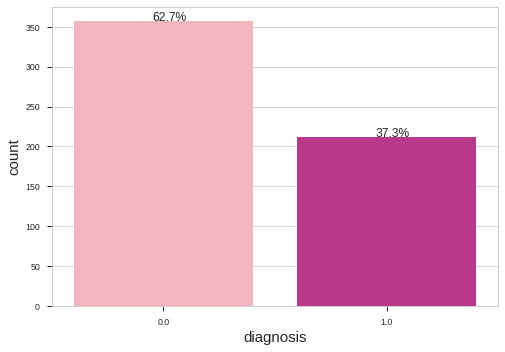

In [92]:
ax = sns.countplot(breast_df['diagnosis'],label="count", palette="RdPu")

without_hue(ax, breast_df['diagnosis'])

The number of **beningant** samples is quite higher than the number of **malign** samples, reaching almost 60/40 percentage difference. This is, **our dataset is imbalanced**. The **majority class is Beningant (B/0)** and the **minority class is Malignant (M/1)**. 

Data imbalance may cause problems when predicting classes. If we have too many samples in one class when compared to the number of classes in the other class (e.g. 100:1), the model is more likely to predict most instances as belonging to the majority class, since, due to the lack of data, it fails to correctly predict the minority class. The ideal case would be that in which we have 1:1. **As our problem is not a case of severe class imbalance, we will not handle it**, since we may introduce bias in our analysis by artificially balance the dataset. If we see that the performance metrics are too low, we will reconsider it.

<a id="univariate"></a>
### <span style="color:slateblue"> 2.3 Univariate Analysis: Graphical</span>

#### <span style="color:#DB8AC4">M/B Frequency Distribution</span>

We will first analyze how feature values are distributed when comparing benign and malignant cases. The way we will do it is by plotting the **frequency distribution** of each variable for each diagnosis by means of **histograms**. 

We will only plot the histograms for the **_mean** variables since these are the most interpretable ones for our purpose, which is to analyze differences in nuclei between malignant and benignant tissues and identify those variables that may be useful for our analysis. 

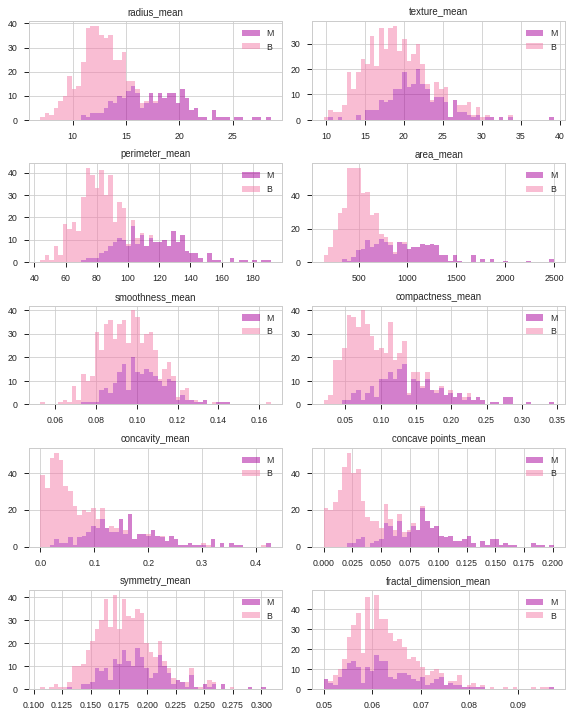

In [93]:
features_mean=list(breast_df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=breast_df[breast_df['diagnosis'] ==1]
dfB=breast_df[breast_df['diagnosis'] ==0]

#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(breast_df[features_mean[idx]]) - min(breast_df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(breast_df[features_mean[idx]]), max(breast_df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['#A9009A','#F47CA9'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

#### Two Sample T-Test
The two sample t-test compares the means of 2 groups with different subjects in a population. Each group is a sample from a distinct population. The responses in each group are independent of those in the other group. The distributions follows a normal curve.

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from scipy.stats import norm, uniform, expon, t
from scipy.stats import kstest, shapiro
from scipy.stats import wilcoxon, ttest_1samp, ttest_rel, mannwhitneyu


In [113]:
# 1. Check if data is normaly distributed
def visual_normality_test(x, bins = 20):

 mu = np.mean(x)
 sigma = np.std(x, ddof = 1) # unbiased std
 plt.figure(figsize = (20,4))
 ax1 = plt.subplot(1,3,1)
 ax1.hist(x,bins=bins, density = True)
 x_axis = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
 ax1.plot(x_axis,norm.pdf(x_axis, mu, sigma),'r',linewidth=2)
 ax1.set_title('Normalized histogram')

 ax2 = plt.subplot(1,3,2)
 ax2.boxplot(x)
 ax2.set_title('Boxplot')

 ax3 = plt.subplot(1,3,3)
 sm.qqplot(x, line='s', ax=ax3)
 ax3.set_title('QQ Plot')
 plt.show()

def check_norm(x):
  visual_normality_test(x, bins=10)
  if x.shape[0] > 50:
    _, p_value = kstest(x,'norm', args=(x.mean(), x.std()) )
  else:
    _, p_value = shapiro(x)

  if p_value > 0.05:
    print('Looks like a normal distribution, p-value:', p_value)
  else:
    print('Does not look like a normal distribution, p-value:', p_value)

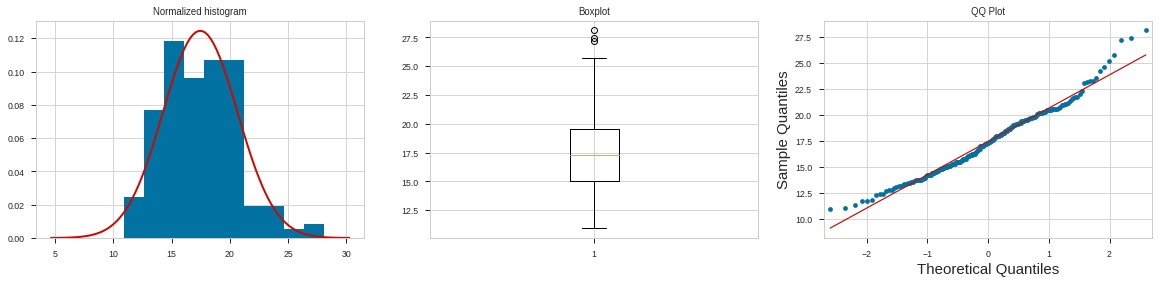

Looks like a normal distribution, p-value: 0.41219311253864876


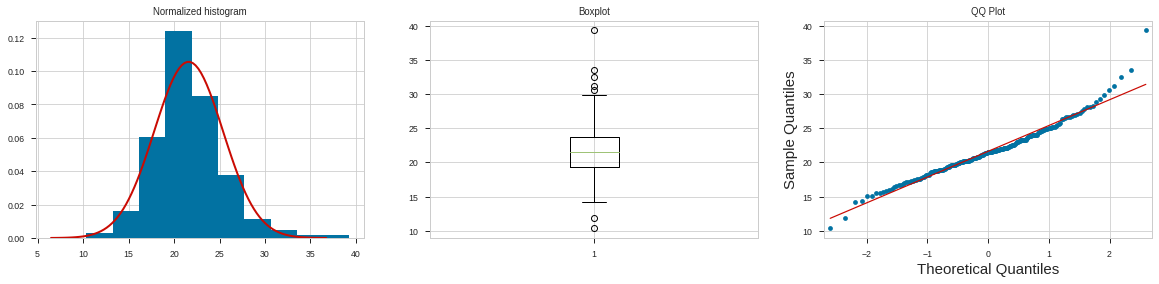

Looks like a normal distribution, p-value: 0.22385419997858585


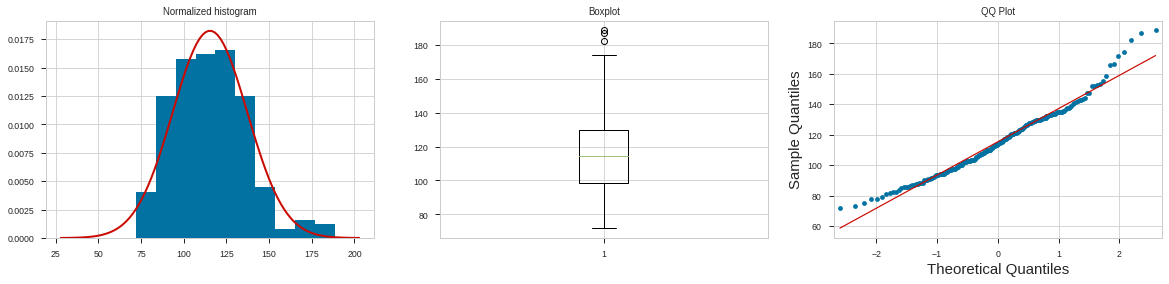

Looks like a normal distribution, p-value: 0.5238838245238037


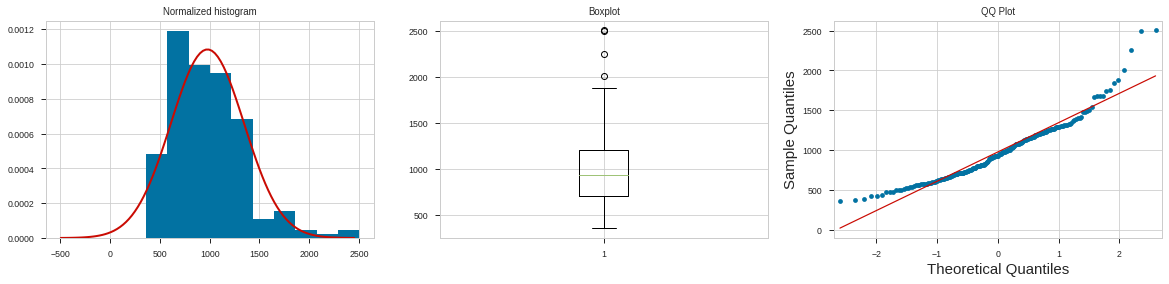

Looks like a normal distribution, p-value: 0.13252489882397148


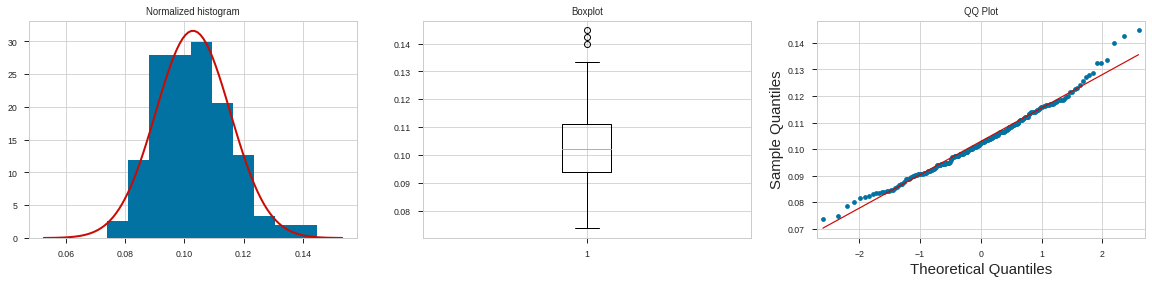

Looks like a normal distribution, p-value: 0.907844035265984


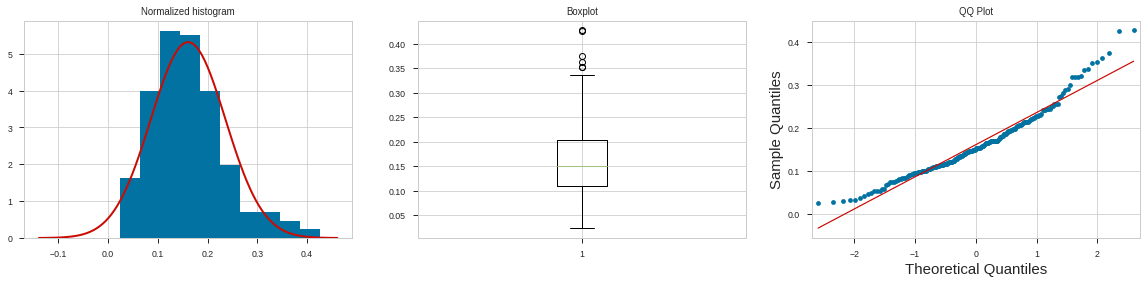

Does not look like a normal distribution, p-value: 0.04951468172176465


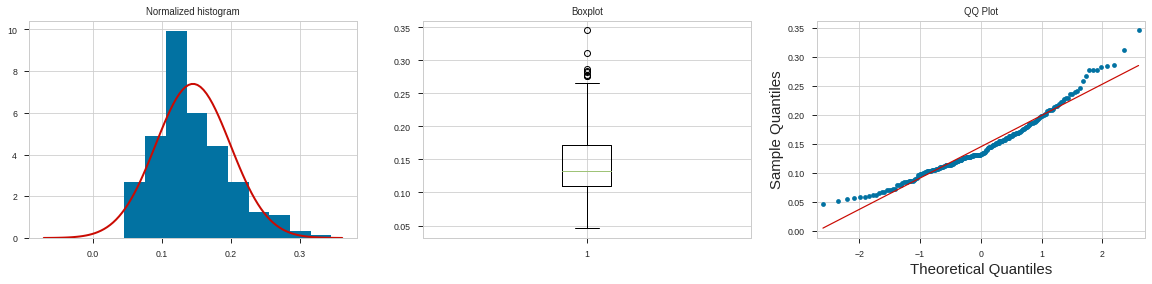

Does not look like a normal distribution, p-value: 0.033959112218074364


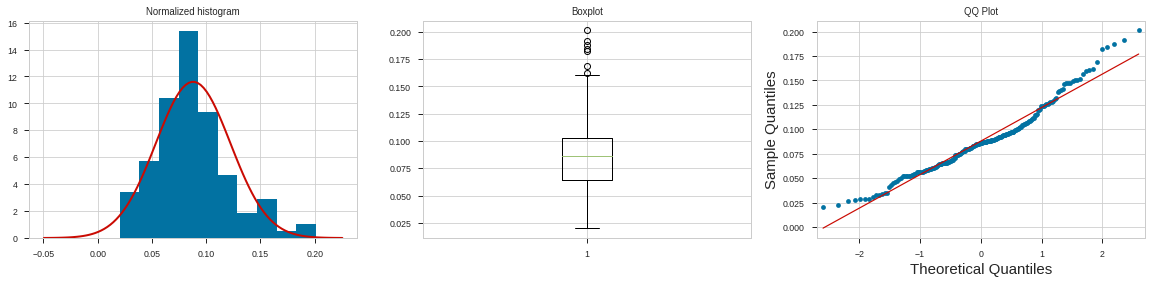

Does not look like a normal distribution, p-value: 0.02993007343177154


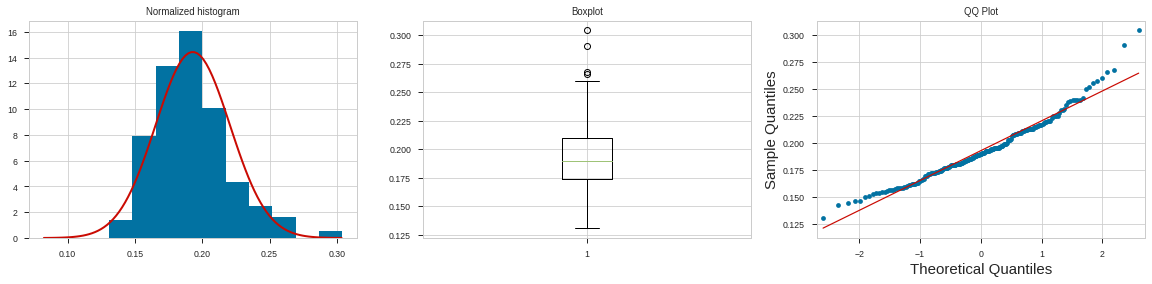

Looks like a normal distribution, p-value: 0.1466564501834569


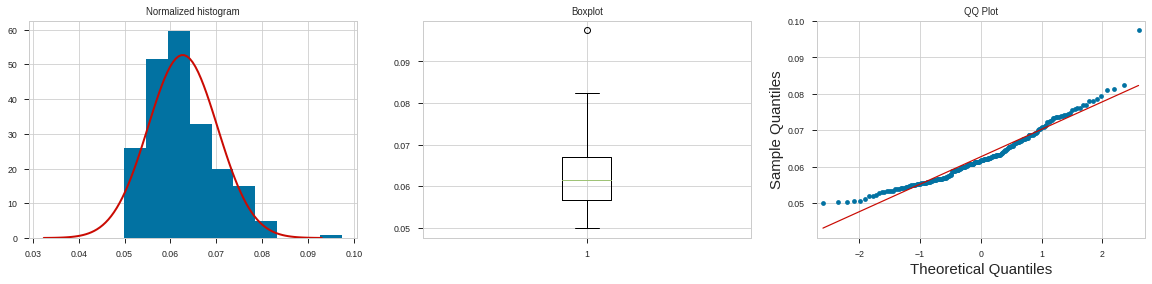

Does not look like a normal distribution, p-value: 0.0416084638974676


In [114]:
check_norm(dfM['radius_mean'])
check_norm(dfM['texture_mean'])
check_norm(dfM['perimeter_mean'])
check_norm(dfM['area_mean'])
check_norm(dfM['smoothness_mean'])
check_norm(dfM['concavity_mean'])
check_norm(dfM['compactness_mean'])
check_norm(dfM['concave points_mean'])
check_norm(dfM['symmetry_mean'])
check_norm(dfM['fractal_dimension_mean'])

In [124]:
def two_sample_ttest(x,y,feature_name):
  from scipy.stats import ttest_ind

  # So, the hypothesis would be H0: mu_x = mu_y vs H1: mu_x != mu_y

  #--- Approach 1: code the test
  x_bar = x.mean()
  y_bar = y.mean()

  # Approach: use ttest_ind
  t_s, p_value = ttest_ind(x, y, equal_var=False)
  print(feature_name)
  print('Statistic:',t_s)
  print('P-value:',p_value)
  if p_value<0.05:
    print('Reject H_0: not equal, discriminative, relevant for classification')
  else:
    print('FAIL to reject H_0')    
  print('_______\n')


def wilcoxon_test(x1,x2,name_dist):
  x=x1-x2
  statistic, p_value_3 = wilcoxon(x)
  print('Wilcoxon test for', name_dist, 'has a p-value:\t\t', p_value_3)
  if p_value_3 < 0.05:
    print('\n- We reject the null hypothesis H0: not equal, discriminative, relevant for classification')
  else:
    print('\n- We fail to reject the null hypothesis H0.')
  print('________\n')

In [125]:
two_sample_ttest(dfM['radius_mean'],dfB['radius_mean'],'radius_mean') #normal
two_sample_ttest(dfM['texture_mean'],dfB['texture_mean'],'texture_mean') #normal
two_sample_ttest(dfM['perimeter_mean'],dfB['perimeter_mean'],'perimeter_mean') #normal
two_sample_ttest(dfM['area_mean'],dfB['area_mean'],'area_mean') #normal
two_sample_ttest(dfM['smoothness_mean'],dfB['smoothness_mean'],'smoothness_mean') #normal
wilcoxon_test(dfM['concavity_mean'],dfB['concavity_mean'],'concavity_mean')
wilcoxon_test(dfM['compactness_mean'],dfB['compactness_mean'],'compactness_mean')
wilcoxon_test(dfM['concave points_mean'],dfB['concave points_mean'],'concave points_mean')
two_sample_ttest(dfM['symmetry_mean'],dfB['symmetry_mean'],'symmetry_mean') #normal
wilcoxon_test(dfM['fractal_dimension_mean'],dfB['fractal_dimension_mean'],'fractal_dimension_mean')

radius_mean
Statistic: 22.208797758464524
P-value: 1.6844591259582747e-64
Reject H_0: not equal, discriminative, relevant for classification
_______

texture_mean
Statistic: 11.022086546579432
P-value: 3.019055292193917e-25
Reject H_0: not equal, discriminative, relevant for classification
_______

perimeter_mean
Statistic: 22.93531376570585
P-value: 1.0231409970104587e-66
Reject H_0: not equal, discriminative, relevant for classification
_______

area_mean
Statistic: 19.640990165554268
P-value: 3.284366459573323e-52
Reject H_0: not equal, discriminative, relevant for classification
_______

smoothness_mean
Statistic: 9.297355109660026
P-value: 5.573331322107757e-19
Reject H_0: not equal, discriminative, relevant for classification
_______

Wilcoxon test for concavity_mean has a p-value:		 6.866066916496567e-95

- We reject the null hypothesis H0: not equal, discriminative, relevant for classification
________

Wilcoxon test for compactness_mean has a p-value:		 6.866066916496567e-95



From the previous histograms, we can deduce several things:
1. Mean values for **radius, texture, perimeter, area, compactness, concavity and concave points** seem to be larger in malignant tissue. Therefore, **these variables may be useful for our analysis**. 
2. Mean values for **smoothness and simmetry** do not seem to change significantly between benignant and malignant tumors. After performing hypothesis testing, we realize that, albeit not at first glance, they can be somehow used to discriminate malign from benign cases, although to a smaller extent than the aforementioned features. Therefore, **these variables may not be that powerful for our analysis, yet still useful**.
3. The Mean value for **fractal dimension** does not seem to change significantly between benignant and malignant tumors. Besides, our statistical analysis conclude that the mean for malign and benign distributions for this feature are equal (H_0, which we failed to reject). Therefore, **this variable may not be that relevant, being our statement grounded on visualization, and statistical tools**.

#### <span style="color:#DB8AC4">Box Plots</span>
We see in the plots that some feature values do not "follow the pattern" of the feature's distribution. **In order to further see how feature values are distributed , we will display boxplots**. Boxplots tell us  the distribution of values through quartiles. 

Scores are sorted. Then four equal sized groups are made from the ordered scores. This is, 25% of all scores are placed in each group. The lines dividing the groups are called *quartiles*, and the groups are referred to as *quartile groups*. We have different elements in our box plots:
1. **Median**: the median (middle quartile) marks the mid-point of the data and is shown by the line that divides the box into two parts. Half the scores are greater than or equal to this value and half are less.

2. **Inter-quartile range**: the middle “box” represents the middle 50% of scores for the group. The range of scores from lower to upper quartile is referred to as the inter-quartile range. The middle 50% of scores fall within the inter-quartile range.

3. **Upper quartile**: seventy-five percent of the scores fall below the upper quartile.

4. **Lower quartile**: twenty-five percent of scores fall below the lower quartile.

5. **Whiskers**: the upper and lower whiskers represent scores outside the middle 50%. Whiskers often (but not always) stretch over a wider range of scores than the middle quartile groups.

Since we have too many features, insead of having a grid of subplots, we will plot each one individually to improve viasualization. 


In [ ]:
for col in breast_df.loc[:, 'radius_mean':].columns:
    breast_df[col].plot(kind='box',figsize=(5,5), colormap='tab20b')
    plt.show()

For most of the variables, there are values that may be considered as **outliers**. We can consider as outliers those values that lie outside the whiskers. In this case, and usually, outliers are identified as those values that are above 1.5 x IQR above the third quartile or below 1.5 x IQR the first quartile. 

We will handle this outliers soon, during data cleaning.

By analizing box plots, we notice that variables are, in general, little dispersed. Boxes height is usually short, which means that feature values are not too dispersed. **The features that show the highest values for dispersion are concavity and concave points**. 

We can also see that some variables are skewed, this may be to the presence of some values that are more related to one diagnosis over another. If, as an example, concavity mean=0 is associated with diagnosis=B, then, since diagnosis=B is the majority class, the data distribution may be skewed. To solve this, both handling outliers and class balance may help. 

### <span style="color:slateblue"> 2.4 Multivariate Analysis</span>

#### <span style="color:#DB8AC4">Correlation</span>

Now we are going to analyze the relationships between pairs of variables. Analyzing the correlation between variables can give us information about:
1. **How to handle missing data**: if two variables are highly correlated, they can be used to predict missing values among themselves. 
2. **Collinearity between variables**: linear models rely on the independency of the variables. The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant. This way, if there exists a significant relationship between predictors, coefficient estimations and predictions can be less precisse and less reliable. It also causes **overfitting** in linear regression analysis models. In our case, we are dealing with a classification problem and we will mainly use non-parametric models, so we won't be significantly affected by multicollinearity. 
3. **Redundant variables**: features that show a very high correlation may suppose adding redundant data to our analysis, since two predictors may be providing the same information about the response variable. We will further confirm this when variables are scaled.
4. **Find relevant relationships for interpretation of the analysis.**

To show correlation between features we will both display a **correlation matrix**, a **heatmap** (Pearson's Correlation Coefficient) and a **scatter plot**. 

In [ ]:
breast_df.corr()

We can see that **this enormous correlation coefficient is difficult to analyze**. In order to make easier the analysis of correlation, **we will plot a heatmap**. This way, we can visually see the strength of the linear relationship between variables.

In [ ]:
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(breast_df.corr(),annot= True,linewidths=1,fmt = ".1f",ax=ax, cmap='RdPu' )
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
plt.show()

As we predicted with the analysis of the B/M histograms, there is a strong positive linear relationship between the target variable, **diagnosis**, and the mean and worst values for **radius, area, perimeter, concavity and concave points** (Pearson's Coefficient >0.7), being the coefficient with **concave points worst the highest**. Therefore, we could confirm that these variables are important for predicting the target variable. 

The features that show the lowest (absolute) correlation coefficients with the variable **diagnosis** are the mean and worst values of **fractal dimension, smoothness, simmetry and texture**, being the **mean value for fractal dimension the lowest**. Therefore, these features may be elegible for dropping for a linear model, such as logistic regression. We cannot confirm there are no relationships between these features and the target variable, we can only say that there are no **linear** relationships.

In general, **standard deviation values show a low correlation with target variable**, except for that of radius, perimeter and area.

We can also detect some relationships between predictors:
1. **Radius, Perimeter and Area** mean and worst values show a correlation coefficient near to 1, which indicates that these variables show a positive relationship almost perfectly linear. Specially for linear models, this may be problematic because of the effects of colinearity on the estimations of the coefficients. It may also lead to overfitting and feature redundancy.
2. **Concave points, concavity and compactness** also show a high correlation among them. 


#### <span style="color:#DB8AC4">Scatter Plots</span>

Now we will display a scatter plot for each of **the first 10 features against the target variable** to see their relationship. We will also plot the histograms for each variable to see their distribution. 

In [ ]:
#We create a list with the columns of our DataFrame
cols = list(breast_df.loc[:, :'fractal_dimension_mean'].columns)

for col in cols:
   
    predictor = col
    plt.figure(figsize=(22,5))
    plt.subplot(1,3,1)
    plt.scatter(breast_df[predictor],breast_df['diagnosis'],alpha=0.2, color='#BF5A96')
    plt.xlabel(predictor)
    plt.ylabel('diagnosis')

    plt.subplot(1,3,2)
    plt.hist(breast_df[predictor],bins=20, color='#FFCCCB')
    plt.xlabel(predictor)

    plt.subplot(1,3,3)
    plt.hist(breast_df['diagnosis'],bins=20, color='#DB8AC4')
    plt.xlabel('diagnosis')

    plt.show()

As we can see, due to the distribution of the outcomes with respect to each of the variables, mean values for **radius, perimeter, area, compactness, concavity and concave points** may be suitable for **logistic regression**, since we can clearly see that samples are well distributed for the sigmoid function to be able to predict the desirable output. 

We can also notice that most of the variables show, approximately, a **normal distribution**. Hence, for future data transformation steps, we could take this into account to choose the correct transformation method (Standard Scaler/Min-Max Scaler/others). It is usually preferrable to use standardization on normally distributed data. Therefore, we will use this method for scaling. 

#### <span style="color:#DB8AC4">Graphical 2D</span>

It's the time to analyze interaction between pairs of variables and data distribution with respect to diagnosis. This may be useful to choose a model that can fit the data in the best manner.

We will plot a **scatter matrix** of the ten first features (representing mean values, since we have seen they are representative of the correlation values for the rest of the features, standard deviation and worst values), and also with the target variable.

In [ ]:
sns.set_context("paper", rc={"axes.labelsize":15})
sns.pairplot(breast_df.loc[:, :'fractal_dimension_mean'], palette="RdPu", hue='diagnosis', diag_kind="hist", corner=True)

In almost every plot, we can see that data show two clear clusters. This is, data is quite differentiates across variables with respect to the diagnosis. The features that do not show a strong behavior in this sense are **simmetry_mean** and **fractal_dimension_mean**. 

By looking at the plots, **we can see that only 2 features may be useful to predict variable diagnosis**, since data is well differentiated for classification algorithms. This is, we are interested in later peforming **feature selection** in order to reduce the dimensionality of our dataset and reduce overfitting. We may also be interested in performing **feature extraction** (e.g. PCA) to find independent components that explain most of the variability of the dataset, getting rid of redundant data and reducing dimensionality as well.

<a id='Pre'></a>
## <span style="color:darkslateblue">3. Pre-processing of the Data Set</span>

### <span style="color:slateblue"> 3.1 Missing Values</span>

As we saw in the previous section, **there are no explicit missing values**. By explicit missing values we mean those values that are actually **NaN** values. Non-explicit missing values are those missing values that must be found by analysis and inspection of the data. As an example, it is possible that some rows have zero values for some features. Then, we could deduce that the data has not been properly collected. It's also possible that these values are rational and consistent with our data. It's easier to identify them when feature domains are properly described in the dataset description by the source.

Looking for zero values is the first approach. In our case, zero values only appear for **concavity and concave points** mean, standard deviation and worst values. By inspecting the dataset, we see that these values only appear for diagnosis="B", which may mean that these values are actually related to this diagnosis and that may be consistent with the data, i.e values are correct.

In [ ]:
breast_df.loc[:, ["diagnosis", "concavity_mean", "concave points_mean"]][breast_df["concavity_mean"]==0].head()

We don't see any other non-explicit missing values by data inspection, so we will move to analyze outliers.

### <span style="color:slateblue"> 3.2 Outliers</span>

We have already displayed the box plot for each feature. Now, we will follow two steps:
1. Find **number of outliers** for each variable.
2. **Handle outliers**: once we determine the number of outliers that each feature presents, we will decide which methods we should follow in order to handle these values. 

First of all, we should analyze descriptive statistic metrics of our data (mean, std, min, max) in order to detect **non-explicit outliers**. This is, there may be some values for our data that are non-rational with respect to the feature nature. It may be possible that there is an error through the collection or integration of the data if values for a feature do not resemble the reality.

As an example, if we suppose that mean value for radius is given in $\mu$, we wouldn't identify any values as non-explicit outliers since min, max and mean correspond to the normal range of values for cell nucleus radius. 

**Since we have not been provided with the characteristics, magnitude and usual domain of our features, we are not able to look for non-explicit outliers**. Therefore, **we will proceed to the automatic analysis of outliers**, that will look for those values that lie outside the "pattern" of the data.

Assuming a **gaussian distribution** of the data, we will detect outliers by computing the z-score for each column. Then, we will consider as outliers those values that lie further than 2.5 standard deviations from the mean, which is approximately equivalent to the outliers considered in the box plots of the previous section.

<img src=https://miro.medium.com/max/1400/1*J5Xm0X-phCJJ-DKZMZ_88w.png width=600>

Since variables show shifted distributions between target values (B/M), we are going to **identify and handle outliers independently for beningant and malignant outcomes**. This way, we won't loose data that may be important for our analysis, and outliers will be properly handled.

Outliers may not be incorrect values but values that lie far from a population. They may be exceptional values, so we should consider this when handling outliers. **It is not acceptable to drop an observation just because it is an outlier**. They can be legitimate observations that can provide interesting information about our data. For this reason, **it's important to further analyze the nature of the outlier before deciding**.

In [ ]:
#List of features
cols = breast_df.loc[:, 'radius_mean':].columns

#Diagnosis=B dataframe (indexes are conserved)
B_df = breast_df[breast_df["diagnosis"]==0]
#Diagnosis=M dataframe
M_df = breast_df[breast_df["diagnosis"]==1]
#Dictionary of dataframes
df_dict = {0: B_df, 1:M_df}

min_ci = []
max_ci=[]
number_outliers=[]
percentage_outliers=[]

#Possible diagnosis values
diagnosis = breast_df['diagnosis'].unique()

for df in range(len(df_dict)):
    
    min_ci_i = []
    max_ci_i=[]
    number_outliers_i=[]
    percentage_outliers_i=[]
    
    label = str(df)
    
    df=df_dict[df]
    
    for col in cols:

        #New items with z-score <= 2.5 will be included in this interval
        confidence_interval = []

        count_outliers = 0

        col_zscore = col + '_zscore'

        #Create a new column for each of the variables in which z-scores are stored
        df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=1)

        for x in range(len(df[col_zscore])):

            #If z-score is less than 2.5, we will add this value to the confidence interval
            if np.absolute(df[col_zscore].iat[x]) < 2.5:

                confidence_interval.append(df[col].iat[x])

            #If not, we will sum one unit to the number of outliers (values = NaN or with z-score > 2.5)
            else:
                  count_outliers += 1
        
        min_ci_i.append(min(confidence_interval))
        max_ci_i.append(max(confidence_interval))
        number_outliers_i.append(count_outliers)
        percentage_outliers_i.append(count_outliers*100/len(breast_df[col]))
        
    min_ci.append(min_ci_i)
    max_ci.append(max_ci_i)
    number_outliers.append(number_outliers_i)
    percentage_outliers.append(percentage_outliers_i)

In [ ]:
#Outliers for B samples
B_outliers_df = pd.DataFrame(list(zip(min_ci[0], max_ci[0], number_outliers[0], percentage_outliers[0])), columns=["Min Confidence Interval", "Max Confidence Interval", "Number of Outliers", "Percentage of Outliers"])
B_outliers_df.index=cols
B_outliers_df

In [ ]:
#Outliers for M samples 
M_outliers_df = pd.DataFrame(list(zip(min_ci[1], max_ci[1], number_outliers[1], percentage_outliers[1])), columns=["Min Confidence Interval", "Max Confidence Interval", "Number of Outliers", "Percentage of Outliers"])
M_outliers_df.index=cols
M_outliers_df

As we can see, **the number of outliers for each variable is very little**. If the proportion of outliers was higher, we would consider to drop some features but, in this case, the percentage is minimum. The low number of outliers, **together with the the abscence of outlier management in previous literature for this dataset, leads us to think that these values may be actually correct values which lie exceptionally far from the mean**. If this is the case, we shouldn't then eliminate them since they could bring some important information about the data distribution and we could make wrong assumptions and obtain bad results in their abscence. 

We can also notice that **confidence intervals are swifted to the right for malignant samples**, as we also notice during data visualization. If we studied outliers for the whole data (B and M), we could lead to wrong conclusions when computing the confidence interval since, as it has been shown, in general, there is a relationship between diagnosis and mean values. 

When managing outliers, in order to implement methods such as **mean, median or random imputation**, then features are assumed to be independent. As we have seen during visualization, this assumption does not hold for our data, since features are highly correlated. Then, by using these methods we could introduce bias in our analysis. 

We should then need to **handle outliers in a tailored way**. Since features are highly correlated, then some features could predict others. In this sense, we could perform regression to predict values considered as outliers training a model with pairs of variables since there may be the case where an observation presents outliers for more than one feature. This method would definitely be the best one but it is **computationally expensive** and maybe, unnecessary since outliers may be just correct values that are not as frequent as others more close to the mean.

Then, **in order to see if the presence of these outliers actually change data assumptions and results**, we are going to create a **dataset where all rows with null values are eliminated, train a model and compare results** with those from another model trained with the original data.

In [ ]:
null_breast_df = breast_df.copy()

indexes = []

for df in range(len(df_dict)):
    label=str(df)
    df=df_dict[df]

    for col in cols:

        col_zscore = col + '_zscore'

        for index, row in df.iterrows():

            #If z-score is less than or equal to 2.5, we will transform this value into a NaN value
            if np.absolute(row[col_zscore]) >= 2.5:
                
                null_breast_df[col].iat[index] = np.nan
                
                indexes.append(index)
                

In [ ]:
#Total number of outliers
null_breast_df.isnull().sum().sum()

In [ ]:
#Dataframe with dropped rows with, at least, one null value
dropped_df=null_breast_df.copy().dropna()
dropped_df.shape

In [ ]:
sns.set_context("paper", rc={"axes.labelsize":15})
sns.pairplot(dropped_df.loc[:, :'fractal_dimension_mean'], palette="RdPu", hue='diagnosis', diag_kind="hist", corner=True)

By now, we can see that **sample distribution has not changed a lot**. Clusters of data can be slightly better identified, but not with dramatic differences. Moreover, we have eliminated 117 observations, which accounts for **20.5% of the data**. We would eliminate a **huge** amount of data, which may not be desirable.

Now we are going to test how the deletion of these outliers may affect performance of the model. To do that, we will train four different models, the ones that we will further use in our analysis, and see how performance metrics change for each one. 

First we will split data into train and test and scale sets.

In [ ]:
#X_d for dropped dataframe and X for original dataset
X_d, X = dropped_df.loc[:, 'radius_mean':], breast_df.loc[:, 'radius_mean':]
y_d, y = dropped_df['diagnosis'], breast_df['diagnosis']

In [ ]:
#Train, Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, random_state = 2)

#Scale data
scaler = StandardScaler()
X_train, X_train_d = scaler.fit_transform(X_train), scaler.fit_transform(X_train_d)
X_test, X_test_d = scaler.fit_transform(X_test), scaler.fit_transform(X_test_d)

In [ ]:
lr = LogisticRegression(random_state=2, solver='liblinear')
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=2)
nn = MLPClassifier(random_state=2)
rf = RandomForestClassifier(random_state=2)

models = [lr, kn, dt, nn, rf]
models_names=['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', "Neural Network Classifier", "Random Forest Classifier"]

train_accuracy = []
cv_accuracy=[]
test_accuracy=[]

data=[[X_train, X_test, y_train, y_test], [X_train_d, X_test_d, y_train_d, y_test_d]]

for dataset in data:
    
    train_accuracy_i=[]
    cv_accuracy_i=[]
    test_accuracy_i=[]
    
    for model in range(len(models)):
        model_ = clone(models[model])
        model_.fit(dataset[0], dataset[2])
        
        #--Train scores
        y_pred_train = model_.predict(dataset[0])
        train_accuracy_i.append(accuracy_score(dataset[2], y_pred_train))
        
        #--Validation scores
        cv_results = cross_validate(model_, dataset[0], dataset[2], scoring=["accuracy"] , return_train_score=True)
        cv_accuracy_i.append(abs(np.mean(cv_results['test_accuracy'])))
                           
        #--Test scores
        y_pred_test = model_.predict(dataset[1])
        test_accuracy_i.append(accuracy_score(dataset[3], y_pred_test))
    
    train_accuracy.append(train_accuracy_i)
    cv_accuracy.append(cv_accuracy_i)
    test_accuracy.append(test_accuracy_i)
    
original_outliers_df = pd.DataFrame(list(zip(train_accuracy[0], cv_accuracy[0], test_accuracy[0])), columns=["Train Accuracy", "Validation Accuracy", "Test Accuracy"])
original_outliers_df.index=models_names
                             
dropped_outliers_df = pd.DataFrame(list(zip(train_accuracy[1], cv_accuracy[1], test_accuracy[1])), columns=["Train Accuracy", "Validation Accuracy", "Test Accuracy"])
dropped_outliers_df.index=models_names


In [ ]:
original_outliers_df.head()

In [ ]:
dropped_outliers_df.head()

We obtain very similar results for both datasets. We obtain, in general, slightly better results for the cleaned dataset. However, **we will rather choose the original dataset to not to lose important information** that may be relevant for future feature selection, extraction and final discussion. Removing such a high percentage of the data is not recommended. Moreover, in this case outliers do not seem to represent incorrect observations since there is not a significant effect on performance. We have also noticed that, in general, outliers have not been treated in other papers.

It's important to note that these results indicate that this dataset may be suitable for **data reduction**, limiting the amount of observations by conserving relevant information. Since our dataset is not too big so computation times may result annoying for the analysis, we will rather mantain our original dataset for modelling.

In [ ]:
ax = sns.countplot(dropped_df['diagnosis'],label="count", palette="RdPu")

without_hue(ax, dropped_df['diagnosis'])

**Dropping rows with outliers leads to a dataset with virtually the same class imbalance** and the same sample distribution (visually), so we can also conclude that **these "outliers" may just be correct values that are far from the population**, since their elimination do not substantially change neither performance metrics nor distribution of the data for modelling.

### <span style="color:slateblue"> 3.3 Class Balancing</span>
We will check if class balancing provides better performance results, since we could introduce bias in our analysis. By undersampling, since we do not have a big dataset, we would loos a huge quantity of data. Therefore, we will use a methdod for class balancing called **SMOTE**. It is an oversampling method that synthetically adds new samples for the minority class. 

As an example in 2D, for each observation that belongs to the under-represented class, the algorithm gets its K-nearest-neighbors and synthesizes a new instance of the minority label at a random location in the line between the current observation and its nearest neighbor. 


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=2)
X_res, y_res = sm.fit_resample(X, y)

In [ ]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, random_state = 2)

#Scale data
X_train_res= scaler.fit_transform(X_train_res)
X_test_res = scaler.fit_transform(X_test_res)

In [ ]:
lr = LogisticRegression(random_state=2, solver='liblinear')
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier(random_state=2)
nn = MLPClassifier(random_state=2)
rf = RandomForestClassifier(random_state=2)

models = [lr, kn, dt, nn, rf]
models_names=['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', "Neural Network Classifier", "Random Forest Classifier"]

train_accuracy = []
cv_accuracy=[]
test_accuracy=[]

data=[[X_train, X_test, y_train, y_test], [X_train_res, X_test_res, y_train_res, y_test_res]]

for dataset in data:
    
    train_accuracy_i=[]
    cv_accuracy_i=[]
    test_accuracy_i=[]
    
    for model in range(len(models)):
        model_ = clone(models[model])
        model_.fit(dataset[0], dataset[2])
        
        #--Train scores
        y_pred_train = model_.predict(dataset[0])
        train_accuracy_i.append(accuracy_score(dataset[2], y_pred_train))
        
        #--Validation scores
        cv_results = cross_validate(model_, dataset[0], dataset[2], scoring=["accuracy"] , return_train_score=True)
        cv_accuracy_i.append(abs(np.mean(cv_results['test_accuracy'])))
                           
        #--Test scores
        y_pred_test = model_.predict(dataset[1])
        test_accuracy_i.append(accuracy_score(dataset[3], y_pred_test))
    
    train_accuracy.append(train_accuracy_i)
    cv_accuracy.append(cv_accuracy_i)
    test_accuracy.append(test_accuracy_i)
    
original_df = pd.DataFrame(list(zip(train_accuracy[0], cv_accuracy[0], test_accuracy[0])), columns=["Train Accuracy", "Validation Accuracy", "Test Accuracy"])
original_df.index=models_names
                             
balanced_df = pd.DataFrame(list(zip(train_accuracy[1], cv_accuracy[1], test_accuracy[1])), columns=["Train Accuracy", "Validation Accuracy", "Test Accuracy"])
balanced_df.index=models_names


In [ ]:
original_df.head()

In [ ]:
balanced_df.head()

Since we **obtained better results after balancing data**, we will retain this new dataset for further analysis.

In [ ]:
X_train, X_test, y_train, y_test = X_train_res, X_test_res, y_train_res, y_test_res

<a id='Modelling'></a>
## <span style="color:darkslateblue">4. **Supervised or Unsupervised Learning**</span>

Since the purpose of the analysis of this dataset is to determine the presence of malignancy in a tisse based on the characteristics of the their nuclei given a set of observations with their corresponding labels, **we will primarily perfrom supervised learning**. This is, we will train a model with labelled observations which will learn the underlying pattern of the data useful to predict labels correctly by minimizing a cost function that takes into account both predicted and current labels. 

Unsupervised learning is used when data is unlabelled, or when we want to get some insight into the distribution of the data when performing exploratory analysis.

We will train four different models corresponding to **Logistic Regression, KNN, Decision Tree and Neural Networks Classifier algorithms**. First, we will tune hyperparameters and analyze validation curves to avoid overfitting and get the best performance metrics. Then, we will train the models with the best parameters found and once obtained the results, we will interpret and discuss them.



### <span style="color:slateblue"> 4.1 Hyperparameter Tuning</span>

**Hyperparameters** are by definition input parameters which are required by an algorithm to learn from data. They **help estimate model parameters** by controlling the learning process of the model and they must be set and tuned manually.

Hyperparameter tuning refers to the process of finding the hyperparameters values for our model to optimally learn from the data. In order to find them, we will use the function **GridSearchCV**. This function helps to find the best hyperparameters by looking for the parameters that provide the best cv scores, according to a predefined score, such as accuracy. In fact, since we are dealing with a classification problem, we will use score **accuracy** to find the best hyperparameters.

For some hyperparameters, such as the number of neighbors, we will have to introduce a range of values to the grid search. In order to avoid overfitting, we will **select ranges of grid params by analyzing validation curves**. Validation curves allow us to find those ranges that provide the best and closest scores for validation and train.

The more the hyperparameters of an algorithm you introduce to the grid seach, the slower the tuning process, since GridSearchCV trains and test every combination of parameters. Therefore, it is desirable to choose a small subset of hyperparameters to search.

#### <span style="color:#DB8AC4">Logistic Regression</span>

Parameters we will tune for Logistic Regression Classifier:
- **Penalty**: norm used for regularization. We will choose between **L1** and **L2**.  <br>
- **C**: this is the regularization parameter ($C=\frac{1}{\lambda}$). It controls the penalty strength ($\text{regularization strength}= \lambda=\frac{1}{C}$). The larger the C value, the less penalty for the regularization norm L1 or L2. C must be greater than 0. Default is 1, so in this case we will select a range of C for search accorcding to the validation curve for this parameter. 

Solver: we will use ***liblinear*** as the model for Logistic Regression. This method is recommended for high dimensional datasets, as in our case. This solver uses **coordinate descent (CD)** algorithm that solves optimization problems by successively performing approximate minimization along coordinate directions or coordinate hyperplanes. It was the one used as default for LogisticRegression() before it was replaced by lbfgs. Furthermore, it can handle both L1 and L2 penalty, whereas lbfgs only handles L1.

In [ ]:
#Validation curve for Logistic Regression parameter C
param_range = np.arange(0.01, 0.4, 0.1)

train_scores, test_scores = validation_curve(estimator=LogisticRegression(random_state=2), 
                                             X=X_train, y=y_train,
                                             cv=10, 
param_name='C', param_range=param_range)

#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

As we can see, approximately at 0.2, validation scores start decreasing, which means that the model may be overfitting, since we can see that scores for train continue increasing while validation scores continue decreasing. Then, we will select a **range of parameters for C such that np.arrange(0.01, 0.2, 0.01)**.

#### <span style="color:#DB8AC4">KNN Classificater</span>

Parameters we will tune for KNN Classifier:
- **Number of neighbors K**: the number f neighbors depends on the data. In order to select a range of K suitable for searching and avoid overfitting, we will look at the validation curve for this variable.
- **Distance Metric**: it defines the way of calculating distances. We will choose beween **Euclidean or Manhattan Distances**. Euclidean distance is the shortest distance between two points, whereas manhattan distance is the sum of absolute differences between points across all the dimensions. 
- **Weights**: weights determine the way in which neighbors are relevant to the prediction. We will choose between **uniform** (all points in each neighborhood are weighted equally** and **distance** (weight points by the inverse of their distance in a way that closer neighbors have a greater influence than those further away).

In [ ]:
#Validation curve for KNN Classifier parameter "n_neighbors"
param_range = np.arange(1,20,1)
train_scores, test_scores = validation_curve(estimator= kn, 
                                             X=X_train, y=y_train,
                                             cv=10, 
param_name='n_neighbors', param_range=param_range)

#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(param_range)
plt.grid()
plt.show()

As we can see, from k=5 on, scores both for train and validation vary accordingly and are similar. Then, we will choose a **k range np.arange(5, 10, 1)**. 

#### <span style="color:#DB8AC4">Decision Tree Classifier</span>

Parameters we will tune for Decision Tree Classifier:
- **Criterion**: this determines the function that will be used to consider the quality of split. We will choose between **Gini** and **Entropy**, which correspond to Gini Index and Information Gain methods, respectively.
- **Max Depth of the tree**: this parameter determines the maximum depth of the tree. 
- **Min Samples per split**: this parameter determines the minimum number of samples required to split an internal node.

The last two parameters determine the complexity of the tree and they are usually tuned in order to avoid overfitting. To select the ranges we will search, we are going to visualize validation curves for both variables.

In [ ]:
#Validation curve for Decision Tree Classifier parameter "max_depth"
param_range = np.arange(1,20,1)
train_scores, test_scores = validation_curve(estimator= dt, 
                                             X=X_train, y=y_train,
                                             cv=10, 
param_name='max_depth', param_range=param_range)

#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(param_range)
plt.grid()
plt.show()

As we can clearly see, train and validation scores increase from 0 until max_depth=2, where train continues slightly increasing whereas validation scores eventually decrease and remain stable, and scores for train and validation start distancing, concluding that from this value on, overfitting may occur.  Therefore, we will choose a **range for max_depth equal to np.arange(2,4,1)**.

In [ ]:
#Validation curve for Decision Tree Classifier parameter "min_samples_leaf"
param_range = np.arange(1,30,1)
train_scores, test_scores = validation_curve(estimator= DecisionTreeClassifier(random_state=2), 
                                             X=X_train, y=y_train,
                                             cv=10, 
param_name='min_samples_leaf', param_range=param_range)

#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter Min Samples per Leaf')
plt.ylabel('Accuracy')
plt.xticks(param_range)
plt.grid()
plt.show()

We see that train and validation reunit as min_samples_leaf increases. Then, we will select a small range of k's in order to search. We will select a **range for min_samples_leaf equal to np.arange(10,20,1)**.

#### <span style="color:#DB8AC4">Neural Network Classifier</span>

Parameters we will tune for Neural Network Classifier are:
- **Size of Hidden Layers**: this parameter determines the size of the ith layer, this is, the number of neurons in the ith layer. To determine the number of layers and we will use validation curves. Usually, there is a common rule-of-thumb that says that the optimal size of hidden layers is usually between the size of the input and the size of the output layers, in our case 30 and 2, respectively. Therefore, we will use a validation curve to select number of hidden layers with number of neurons 2/3 the size of the input layer, plus the size of the output layer (another rule-of-thumb). Then number of neurons will be equal to 22.
- **Solver**: we will choose solver between **sgd** and **adam**. Sgd corresponds to stochastic gradient descent and adam corresponds to an optimized version of the stochastic gradient descent. 
- **Activation function**: this is the activation function for the last hidden layer. We will choose between **logistic, tanh and relu** functions. 

In [ ]:
#Validation curve for MLP Classifier parameter "hidden_layer_sizes"

#For two hidden layers, each with 22 neurons, it will be (22,22)

param_range = [(22,)]

for element in range(2,10,1):
    param_range.append(param_range[0]*element)

train_scores, test_scores = validation_curve(estimator= MLPClassifier(random_state=2), 
                                             X=X_train, y=y_train,
                                             cv=10, 
param_name='hidden_layer_sizes', param_range=param_range)

#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#

x_range=range(len(param_range))
x_range=[x+1 for x in x_range]

plt.plot(x_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(x_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.xticks(x_range)
plt.grid()
plt.show()

We can notice that scores for validation and train separate after number of hidden layers is equal to 1, when distances between train and validation accuracies become wider, which may mean that the model is overfitting.

Therefore, **we will use a range for hidden_layer_sizes such as [(22,), (22,22)]**.


#### <span style="color:#DB8AC4">Random Forest Classifier</span>

Parameters we will tune for Random Forest:
1. **Criterion**: as we said with decision trees, we will choose between **gini and entropy**.
2. **Maximum depth of the tree**
3. **Min Samples per Split**

In [ ]:
#Validation curve for Random Forest Classifier parameter "max_depth"
param_range = np.arange(1,20,1)
train_scores, test_scores = validation_curve(estimator= RandomForestClassifier(random_state=2), 
                                             X=X_train, y=y_train,
                                             cv=10, 
param_name='max_depth', param_range=param_range)

#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter Maximum Depth')
plt.ylabel('Accuracy')
plt.xticks(param_range)
plt.grid()
plt.show()

As we can clearly see, train and validation scores increase from 0 until max_depth=2, where train continues slightly increasing whereas validation scores start varying in a great extent, and scores for train and validation start distancing, concluding that from this value on, overfitting may occur.  Therefore, we will choose a **max_depth equal to np.arange(1,4,1)**.

In [ ]:
#Validation curve for Random Forest Classifier parameter "min_samples_leaf"
param_range = np.arange(1,50,1)
train_scores, test_scores = validation_curve(estimator= RandomForestClassifier(random_state=2), 
                                             X=X_train, y=y_train,
                                             cv=10, 
param_name='min_samples_leaf', param_range=param_range)

#
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
#
# Plot the model scores (accuracy) against the paramater range
#
plt.plot(param_range, train_mean, 
         marker='o', markersize=5, 
         color='blue', label='Training Accuracy')
plt.plot(param_range, test_mean, 
         marker='o', markersize=5, 
         color='green', label='Validation Accuracy')
plt.xlabel('Parameter Min Samples per Leaf')
plt.ylabel('Accuracy')
plt.xticks(param_range)
plt.grid()
plt.show()

We can see that the highest validation accuracy is obtained with min_samples_leaf=2, but the difference between train and validation accuracies is great as well. Therefore, we will rather choose a range of valies for which the difference between validation and train scores is lower, so we avoid overfitting. Then, we will choose a range of values for **min_samples_leaf** equal to **np.arange(3,10,1)** where sores are the highest and the most similar.

Now we have determined all our hyperparameter ranges and possible values, we will proceed to find the best for each model.


#### <span style="color:#DB8AC4">Hyperparameter GridSearchCV</span>

In [ ]:
random_state=2

models_names=['Logistic Regression', 'KNN Classifier', 'Decision Tree Classifier', "Neural Network Classifier", "Random Forest Classifier"]


clfs= [LogisticRegression(solver='liblinear', random_state=random_state), KNeighborsClassifier(),
       DecisionTreeClassifier(random_state=random_state),MLPClassifier(random_state=random_state), RandomForestClassifier(random_state=2)]

params={0: {'penalty':['l1', 'l2'], 'C': np.arange(0.01, 0.2, 0.01)}, 
       1: {'n_neighbors':np.arange(5, 10, 1), 'metric':['euclidean','manhattan'], 'weights': ['uniform', 'distance']},
       2: {'criterion':['gini', 'entropy'], 'max_depth':np.arange(2,4,1), 'min_samples_leaf': np.arange(10,20,1)}, 
       3: {'hidden_layer_sizes': [(22,), (22, 22)], 'solver':['sgd', 'adam'], 'activation':['logistic', 'tanh', 'relu']},
       4: {'criterion':['gini', 'entropy'], 'max_depth':np.arange(1,4,1), "min_samples_leaf": np.arange(3,10,1)}}

def Grid_Search_cv(model_index, X, y):
    
    grid = GridSearchCV(clfs[model_index], params[model_index], verbose = 0, cv = 5, n_jobs = -1, return_train_score = True)

    grid_results = grid.fit(X, y)
    
    return grid_results.best_estimator_.get_params()

In [ ]:
best_params_lr = Grid_Search_cv(0, X_train, y_train)
best_params_kn = Grid_Search_cv(1, X_train, y_train)
best_params_dt = Grid_Search_cv(2, X_train, y_train)
best_params_nn = Grid_Search_cv(3, X_train, y_train)
best_params_rf = Grid_Search_cv(4, X_train, y_train)

In [ ]:
best_params_=[best_params_lr, best_params_kn, best_params_dt, best_params_nn, best_params_rf]

for i in range(len(models_names)):
    print(" ")
    print('\033[1m' + 'Best parameter for ' + str(models_names[i]) +'\033[0m')
    print(best_params_[i])
    

### <span style="color:slateblue"> 4.2 Model Training</span>

Now we have obtained the best hyperparameters, we will get the performance metrics of the optimized models, comparing the results with those from models without hyperparameter tuning. 

To compare both types of models we will use three metrics based on the **confusion matrix**:
1. **Accuracy**: it's the most common evaluation metric for classification problems. It tells us how many predictions have been correctly done (TP+TN)/(TP+TN+FP+FN), where positive is considered malignant (diagnosis=1).
2. **Recall**: it is the ratio of true positives to all positives predicted by the model. This is, it tell us how many malignant tissues are actually mallignant .
3. **Precision**: it's the ratio of true positives to the number of true positives plus the number of false negatives. True negative valies are data points classified as positive by the model that are actually positive, and false negatives are data points that the model identifies as negative that are actually positive. It tells us how many malignant tissues are actually predicted as mallignant.
4. **F1-score**: f1 score is calculated as a function of precision and recall. It allows us to consider a balance between precision and recall.
<br>
<img src=https://onlinehelp.explorance.com/blueml/Content/Resources/Images/ml/truefalsepositives.png width=600>

In [ ]:
train_accuracy=[]
train_recall=[]
train_precision=[]
train_f1=[]

cv_accuracy=[]
cv_precision=[]
cv_recall=[]
cv_f1=[]

test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

for ix in range(len(models_names)):
    
    original_model=clone(clfs[ix])
    
    optimized_model=clone(clfs[ix]).set_params(**best_params_[ix])
    
    models=[optimized_model, original_model]
    
    for model in models:
        
        model = clone(model)
        
        model.fit(X_train, y_train)
        
        #--Train scores
        y_pred_train = model.predict(X_train)
        train_accuracy.append(accuracy_score(y_train, y_pred_train))
        train_recall.append(recall_score(y_train, y_pred_train))
        train_precision.append(precision_score(y_train, y_pred_train))
        train_f1.append(f1_score(y_train, y_pred_train))
        
        #--Validation scores
        cv_results = cross_validate(model, X_train, y_train, scoring=["accuracy", "recall", "precision", "f1"])
        cv_accuracy.append(abs(np.mean(cv_results['test_accuracy'])))
        cv_recall.append(abs(np.mean(cv_results['test_recall'])))
        cv_precision.append(abs(np.mean(cv_results['test_precision'])))
        cv_f1.append(abs(np.mean(cv_results['test_f1'])))
        
        #--Test scores
        y_pred_test = model.predict(X_test)
        test_accuracy.append(accuracy_score(y_test, y_pred_test))
        test_recall.append(recall_score(y_test, y_pred_test))
        test_precision.append(precision_score(y_test, y_pred_test))
        test_f1.append(f1_score(y_test, y_pred_test))


        

In [ ]:
index_names=['Logistic Regression Tuned', 'Logistic Regression', 'KNN Classifier Tuned', 'KNN Classifier', 
            'Decision Tree Classifier Tuned', 'Decision Tree Classifier', 'Neural Network Classifier Tuned', 'Neural Network Classifier',
            'Random Forest Classifier Tuned', 'Random Forest Classifier'
            ]

ht_results = pd.DataFrame(list(zip(train_accuracy, train_recall, train_precision, train_f1, cv_accuracy, cv_recall,
                                  cv_precision, cv_f1, test_accuracy, test_recall, test_precision, test_f1)), columns=["Train Accuracy",
                                                                                                       "Train Recall", "Train Precision", "Train F1", 
                                                                                                       "Validation Accuracy", "Validation Recall", 
                                                                                                       "Validation Precision","Validation F1", "Test Accuracy", 
                                                                                                       "Test Recall", "Test Precision", "Test F1"])
ht_results.index=index_names


In [ ]:
ht_results

**Results from models with hyperparameter tuning are very similar to those with no hyperparameter tuning.** In general, we obtain really good performance metrics for every model, which lead us to think that these variables are indeed useful to predict the malignancy or benignancy of a tissue based on the characteristics of its nuclei. Metrics show that, in general, all the models have a great ability to correctly label those samples which are actually malignant as malignant, and to identify malignant samples among all the observations. 

We can see that both accuracy and f1 scores seem to be slightly higher (really slightly) for models with hyperparameter tuning. **The models that perform the best for our data based on accuracy and F1 metrics are Logistic Regression and Neural Network Classifiers**. These two models, along with KN, provides perfect precision on test data. This is, all samples predicted as malignant are actually malignant. 

For clinical purposes, we would like to have perfect recall, this is, identify all malignant samples among observations. The results do not show a recall as good as the precision, but it's still quite good. **In general, all the models would find approximately 9/10 malignant samples.** This is good!

We also see that **tuned Decision Tree and Random Forest models avoid overfitting that was happening with non-tuned models**. 

### <span style="color:slateblue"> 4.3 Interpretability</span>

Now we are going to analyze at which extent features contributed to the predictions. Explainable AI can be summed up as the process to **understand the predictions of an ML model**. The idea is to make the model as interpretable as possible which will essentially help in testing its reliability and causality of features. In the case of these models, we would like to know how predictions for life expectancy have been made. Some models will be more explainable than others, for example, neural networks vs logistic regression. 

In the case of **Logistic Regression and Decission Trees, it is easy to determine feature importance**. For Logistic Regression we just have to plot the coefficients for each feature and for decision trees, we just have to obtain the variables on which the splits were made through the decision tree.  

There are specific libraries dedicated to this topic such as **SHAP** or **LIME**. SHAP is more reliable and accurate but LIME is faster, so LIME is sometimes preferrable. In fact, due to the size of our data, using SHAP would be prohibitibe. Hence, we will analize interpretability locally, by choosing a small set of samples and see how model predicted these values.

With **LIME**, we will be able to see **how the model predicted the value** as a function of **weights** put on the values of different features (seen in a table) for an observation. For a given sample prediction LIME does the following: 
1. Generate a **perturbated dataset**. This is, it creates a new dataset by alterating the values of the original datast.
2. Use a **ML classifier to predict classes of the new generated dataset**. This is, we use the ML trained on the original data to predict values of this new generated dataset.
3. Compute **distances between the instance being explained from the original dataset and each one of the generated points using euclidean distance** (other distance metrics can also be used). Such distances are normalized and mapped to a value between 0 and 1. 
4. We **train an interpretable ML model with the weighted alterated samples** as X_train and the predictions obtained with the original ML model as y_train. Weight on samples will affect the optimization of the cost function in a way that closer points will have greater impact than more distant points. This is, wrong predictions of closer poijnts will have a higher penalty.
5. We **obtain feature importance as a function of the coefficients (weights) for each feature in the interpretable fitted model**.

It will allow us to see which features contribute the most to a specific output of the model **when the model acts as a black box**, such as in the case of Neural Networks. Moreover, LIME shows the ranges of values of each feature that characterize the decision of the algorithm.

#### <span style="color:#DB8AC4">Logistic Regression</span>

We just plot the absolute values of the coefficients of the logistic regression model, being data previously scaled.

In [ ]:
ex_lr = clone(clfs[0]).set_params(**best_params_[0])
ex_lr.fit(X_train, y_train)

coeff = np.abs(ex_lr.coef_)[0]
ranking=list(coeff.argsort())[::-1]

x = np.arange(1,31)

ax = sns.barplot(x=x, y=coeff, color='#BF5A96')

print("\033[1m\033[4mRanking (Descending Order)\033[0m\n")
for n, i in enumerate(ranking):
    print(str(n+1)+'.' + X.columns[i])

#### <span style="color:#DB8AC4">Decision Tree Classifier</span>

In this case, we will use yellowbrick method to plot feature importance of Decision Tree models quickly.

In [ ]:
viz = FeatureImportances(clone(clfs[2]).set_params(**best_params_[2]), labels=X.columns, colormap='PuRd')
viz.fit(X_train, y_train)
viz.show()

#### <span style="color:#DB8AC4">KNN Classifier</span>

We will plot LIME results for a set of five random samples.

In [ ]:
# LIME has one explainer for all models
explainer = lime.lime_tabular.LimeTabularExplainer(X_train,
feature_names=X.columns.values.tolist(),
class_names=[0,1], random_state=2)

In [ ]:
ex_knn= clone(clfs[1]).set_params(**best_params_[1])
ex_knn.fit(X_train, y_train)

for n in np.arange(1,6):
    sample_idx= random.randint(0,len(X_test))
    exp = explainer.explain_instance(X_test[sample_idx], ex_knn.predict_proba, num_features=6)
    exp.show_in_notebook(show_table=True)

#### <span style="color:#DB8AC4">Neural Network Classifier</span>

We will plot LIME results for a set of five random samples.

In [ ]:
ex_nn= clone(clfs[3]).set_params(**best_params_[3])
ex_nn.fit(X_train, y_train)

for n in np.arange(1,6):
    sample_idx= random.randint(0,len(X_test))
    exp = explainer.explain_instance(X_test[sample_idx], ex_nn.predict_proba, num_features=6)
    exp.show_in_notebook(show_table=True)

#### <span style="color:#DB8AC4">Random Forest Classifier</span>

We will plot LIME results for a set of five random samples.

In [ ]:
ex_nn= clone(clfs[4]).set_params(**best_params_[4])
ex_nn.fit(X_train, y_train)

for n in np.arange(1,6):
    sample_idx= random.randint(0,len(X_test)-1)
    exp = explainer.explain_instance(X_test[sample_idx], ex_nn.predict_proba, num_features=6)
    exp.show_in_notebook(show_table=True)

#### <span style="color:#DB8AC4">Conclusion</span>

By inspection, the **features that repeat the most among the most important features for each model are worst and mean values for texture, radius, perimeter, concave points and area**, given worst values more importance in general. **Fractal dimension and smoothness mean and worst values are also frequent as the main predictors**.

These results lead us to think that worst values are very useful when determining if nuclei chatacteristics correspond to malignant cells in tissue samples. Mean values as well, whereas se values do not seem to contribute so much to the predictions except for those of area, radius and perimeter.

<a id='Feature'></a>
## <span style="color:darkslateblue">5. **Feature Selection and Extraction**</span>
It's possible that **some features are irrelevant** for our analysis or they may even **introduce some bias**. By using so many features for modelling, we may **reduce our ability to generalize**. Moreover, a high dimensionality dataset is commonly **computationally expensive**. In order to avoid these issues, we will perform feature selection and extraction.

We will first perform feature selection, train previous tuned models and compare metrics with those obtained for the non-reduced dataset.

### <span style="color:slateblue"> 5.1 Feature Selection</span>

In this section we will compare performance metrics applying three types of feature selection methods:
1. [**Filter Methods**: F1-Score](#F1)
2. [**Filter Methods**: Mutual Information](#MI)
3. [**Wrapper Methods**: Backward Selection](#BS)

**Filter methods** evaluate the relevance of each variable by individually examining the intrinsic properties of the data. These are the type of methods where **individual features are ranked according to predefined relevance score**. The top N features are then selected. Statistical tests can be used to select those features that have the strongest relationship with the output variable. Selected variables constitute the input space of the ML algorithm.

**Filter methods** are **easy and fast to implement**, but the downside of these methods is that **interactions among independent features are not considered**.

**Wrapper methods** use combinations of variables to determine predictive power. This is, these methods use a ML algorithm of interest as a black box to score subsets of variables according to their predictive power. 

Unlike filter methods, wrapper methods look for **interactions and dependencies between features**. However, it is usually **computationally expensive** since, for each subset evaluation, a new model must be created and the algorithm must be trained and tested to obtain its performance. Moreover, it's usually **difficult to interpret** and is **prone to overfit**.

This model follows a **greedy search** by the evaluation of all the possible combinations of features against the **evaluation criterion**. The evaluation criterion is simply the performance measure, which will depend on the type of the problem. 


We will **first find the number of features that provides the best accuracy** based on feature selection with each of the methods. To do that, We will see how k affects performance of both Logistic Regression and Neural Networks Classifiers, the ones that best performed in our data, and select the best k. .**Then, after comparing results for the three techiques, we will train original models with a specific number of selected features for each of the methods that will be selected based on results**.

<font color='red'>**Note**: feature selection and extraction must be performed using training data only. Test data is actually used in order to measure the performance of our model with unseen data. This unseen data should not participate neither in the feature selection/extraction processes nor in the training of our model.</font>

<a id='F1'></a>
#### <span style="color:#DB8AC4">5.1.1 Filter Methods: F1-Score</span>

**Correlation** measures the strength of the linear relationship between two variables. The *Pearson Correlation Coefficient* is the coefficient used for this approach by *f_regression* to calculate the statistic by which features are ranked, **F-statistic**. When normalized, F-statistic ranges from 0 to 1 and tells us if the correlation coefficient for a given feature-target relationship is significantly different from zero. This method does not take into account labels.

The downside of a filter method using Pearson's correlation coefficient is that it assumes that independent features have a linear relationship with the target variable and that variables are normally distributed. Furthermore, F-test assumes that variables are independent from one another. Therefore, it could provide wrong assumptions about feature relevance if there is a non-linear relationship between independent and dependent variables and if independent variables are correlated, as in our case. 

We will **first find the number of features that provides the best accuracy** based on feature selection with *f_regression*. To do that, We will see how k affects performance of both Logistic Regression and Neural Networks Classifiers, the ones that best performed in our data, and select the best k.

In [ ]:
cv_accuracy=[]
cv_f1=[]

for model in [0,3]:
    
    cv_accuracy_i=[]
    cv_f1_i=[]

    for k in np.arange(1,len(X.columns)+1):

        #Select K best features
        selector = SelectKBest(score_func=f_regression, k=k)
        #Fit selector with train data
        new_data = selector.fit(X_train, y_train)

        #Obtain most relevant column indices
        cols_index = selector.get_support(indices = True)
        cols = [i for i in X.columns[cols_index]]
        #F-test scores
        score = selector.scores_
        score /= np.max(score)

        lr_s = clone(clfs[model]).set_params()
        lr_s.fit(X_train[:, cols_index], y_train)

        #CV scores
        cv_results = cross_validate(lr_s, X_train[:, cols_index], y_train, scoring=["f1", "accuracy"])
        cv_accuracy_i.append(abs(np.mean(cv_results['test_accuracy'])))
        cv_f1_i.append(abs(np.mean(cv_results['test_f1'])))
    
    cv_accuracy.append(cv_accuracy_i)
    cv_f1.append(cv_accuracy_i)

fig,axes =plt.subplots(2,2, figsize=(20,10))

a1 = sns.pointplot(x=x, y=cv_accuracy[0], color='#BF5A96', ax=axes[0,0] )
a2 = sns.pointplot(x=x, y=cv_f1[0], color='#BF5A96', ax=axes[0,1])
a3 = sns.pointplot(x=x, y=cv_accuracy[1], color='#BF5A96', ax=axes[1,0])
a4 = sns.pointplot(x=x, y=cv_f1[1], color='#BF5A96', ax=axes[1,1])


a1.set(xlabel='# features', ylabel='accuracy', title="Logistic Regression")
a2.set(xlabel='# features', ylabel='f1', title="Logistic Regression")
a3.set(xlabel='# features', ylabel='accuracy', title="Neural Network")
a4.set(xlabel='# features', ylabel='f1', title="Neural Network")

plt.xticks()
#Print best result
print("\033[1m\nThe number of features which provides the highest accuracy for Logistic Regression is:\033[0m", cv_accuracy[0].index(max(cv_accuracy[0])) + 1)
print("\033[1m\nThe number of features which provides the highest F1 for Logistic Regression is:\033[0m", cv_f1[0].index(max(cv_f1[0])) + 1)

#Print best result
print("\033[1m\nThe number of features which provides the highest accuracy for Neural Networks is:\033[0m", cv_accuracy[1].index(max(cv_accuracy[1])) + 1)
print("\033[1m\nThe number of features which provides the highest F1 for Neural Networks is:\033[0m", cv_f1[1].index(max(cv_f1[1])) + 1)

We can see that **performance is almost the same for both models** as number of features vary, but for **k=26** neural networks classifier reaches a higher accuracy and f1. **Just by selecting one feature, we can see that an accuracy of 0.92 is obtained**. By selecting **21 features**, we still get a higher accuracy score for neural networks, better than that obtained with 30 features, and by reducing dimensionality in 9 features. 

Obtaining such good results lead us to think that there is some **redundancy among features** and that, since we obtained better results for some k than with the original dataset, there are some other **features irrelevant for our analysis**.

In [ ]:
#--Obtain transformed X_train, X_test

#Select K best features
selector = SelectKBest(score_func=f_regression, k=5)
#Fit selector with train data
new_data = selector.fit(X_train, y_train)

#Obtain most relevant column indices
cols_index = selector.get_support(indices = True)
cols = [i for i in X.columns[cols_index]]
non_relevant = [i for i in X.columns if i not in cols]

#F-test scores
score = selector.scores_
score /= np.max(score)

#Ranking
ranking_fs=np.argsort(-score)
ranking_fs=[i for i in X.columns[ranking_fs]]
ranking_fs= pd.DataFrame([ranking_fs], columns=np.arange(1,31), index=['ranking']).T

bag_names = []
for name in X.columns:
    if name not in cols:
        bag_names.append('No')
    else:
        bag_names.append('Yes')
        
f_regression_features = pd.DataFrame([bag_names], columns=X.columns, index=['selected'])

X_train_fs, X_test_fs = X_train[:, cols_index], X_test[:, cols_index]

In [ ]:
f_regression_features

In [ ]:
ranking_fs

Most relevant features coincide with those which show the highest correlation with the target variable. As we can see, **these features are very similar from those found during model interpretation**.

In [ ]:
train_accuracy=[]
train_recall=[]
train_precision=[]
train_f1=[]

cv_accuracy=[]
cv_precision=[]
cv_recall=[]
cv_f1=[]

test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

datasets=[[X_train_fs, X_test_fs], [X_train, X_test]]

for ix in range(len(models_names)):
    
    original_model=clone(clfs[ix])    
    
    for dataset in datasets:
        
        original_model.fit(dataset[0], y_train)
        
        #--Train scores
        y_pred_train = original_model.predict(dataset[0])
        train_accuracy.append(accuracy_score(y_train, y_pred_train))
        train_recall.append(recall_score(y_train, y_pred_train))
        train_precision.append(precision_score(y_train, y_pred_train))
        train_f1.append(f1_score(y_train, y_pred_train))
        
        #--Validation scores
        cv_results = cross_validate(original_model, dataset[0], y_train, scoring=["accuracy", "recall", "precision", "f1"] , return_train_score=True)
        cv_accuracy.append(abs(np.mean(cv_results['test_accuracy'])))
        cv_recall.append(abs(np.mean(cv_results['test_recall'])))
        cv_precision.append(abs(np.mean(cv_results['test_precision'])))
        cv_f1.append(abs(np.mean(cv_results['test_f1'])))
        
        #--Test scores
        y_pred_test = original_model.predict(dataset[1])
        test_accuracy.append(accuracy_score(y_test, y_pred_test))
        test_recall.append(recall_score(y_test, y_pred_test))
        test_precision.append(precision_score(y_test, y_pred_test))
        test_f1.append(f1_score(y_test, y_pred_test))


In [ ]:
index_names=['Logistic Regression FS', 'Logistic Regression', 'KNN Classifier FS', 'KNN Classifier', 
            'Decision Tree Classifier FS', 'Decision Tree Classifier', 'Neural Network Classifier FS', 'Neural Network Classifier',
             'Random Forest Classifier FS', 'Random Forest Classifier'
            ]

fs_results = pd.DataFrame(list(zip(train_accuracy, train_recall, train_precision, train_f1, cv_accuracy, cv_recall,
                                  cv_precision, cv_f1, test_accuracy, test_recall, test_precision, test_f1)), columns=["Train Accuracy",
                                                                                                       "Train Recall", "Train Precision", "Train F1", 
                                                                                                       "Validation Accuracy", "Validation Recall", 
                                                                                                       "Validation Precision","Validation F1", "Test Accuracy", 
                                                                                                       "Test Recall", "Test Precision", "Test F1"])
fs_results.index=index_names

fs_results


<a id='MI'></a>
#### <span style="color:#DB8AC4">5.1.2 Filter Methods: Mutual Information</span>

**Mutual information** methods capture any kind of statistical dependency between random variables. It can be thought as the reduction in uncertainty about one random variable given knowledge about another. In machine learning, mutual information measures how much information the presence/absence of a feature contributes to making the correct prediction on Y.

It ranges from 0 to 1. High mutual information indicated a large reduction in uncertainty; low mutual information indicates a small reduction; and zero mutual information between two random variables indicates that the variables are independent.


In [ ]:
cv_accuracy=[]
cv_f1=[]

for model in [0,3]:
    
    cv_accuracy_i=[]
    cv_f1_i=[]

    for k in np.arange(1,len(X.columns)+1):

        #Select K best features
        selector = SelectKBest(score_func=mutual_info_regression, k=k)
        #Fit selector with train data
        new_data = selector.fit(X_train, y_train)

        #Obtain 10 most relevant column indices
        cols_index = selector.get_support(indices = True)
        cols = [i for i in X.columns[cols_index]]
        #F-test scores
        score = selector.scores_
        score /= np.max(score)

        lr_s = clone(clfs[model])
        lr_s.fit(X_train[:, cols_index], y_train)

        #CV scores
        cv_results = cross_validate(lr_s, X_train[:, cols_index], y_train, scoring=["f1", "accuracy"])
        cv_accuracy_i.append(abs(np.mean(cv_results['test_accuracy'])))
        cv_f1_i.append(abs(np.mean(cv_results['test_f1'])))
    
    cv_accuracy.append(cv_accuracy_i)
    cv_f1.append(cv_accuracy_i)

fig,axes =plt.subplots(2,2, figsize=(20,10))

a1 = sns.pointplot(x=x, y=cv_accuracy[0], color='#BF5A96', ax=axes[0,0] )
a2 = sns.pointplot(x=x, y=cv_f1[0], color='#BF5A96', ax=axes[0,1])
a3 = sns.pointplot(x=x, y=cv_accuracy[1], color='#BF5A96', ax=axes[1,0])
a4 = sns.pointplot(x=x, y=cv_f1[1], color='#BF5A96', ax=axes[1,1])


a1.set(xlabel='# features', ylabel='accuracy', title="Logistic Regression")
a2.set(xlabel='# features', ylabel='f1', title="Logistic Regression")
a3.set(xlabel='# features', ylabel='accuracy', title="Neural Network")
a4.set(xlabel='# features', ylabel='f1', title="Neural Network")

plt.xticks()
#Print best result
print("\033[1m\nThe number of features which provides the highest accuracy for Logistic Regression is:\033[0m", cv_accuracy[0].index(max(cv_accuracy[0])) + 1)
print("\033[1m\nThe number of features which provides the highest F1 for Logistic Regression is:\033[0m", cv_f1[0].index(max(cv_f1[0])) + 1)

#Print best result
print("\033[1m\nThe number of features which provides the highest accuracy for Neural Networks is:\033[0m", cv_accuracy[1].index(max(cv_accuracy[1])) + 1)
print("\033[1m\nThe number of features which provides the highest F1 for Neural Networks is:\033[0m", cv_f1[1].index(max(cv_f1[1])) + 1)

For k>16 we see that scores are virtually the same for both models. For **k=27**, Neural Networks achieve the best accuracy, better than that od the model with 30 features. Therefore, we may think that some features are irrelevant for our analysis.

As in the case of filter methods, we also obtained that for one single feature selected, accuracy and f1 scores were approximately 0.9, which are still good values. 

In [ ]:
#--Obtain transformed X_train, X_test

#Select K best features
selector = SelectKBest(score_func=mutual_info_regression, k=5)
#Fit selector with train data
new_data = selector.fit(X_train, y_train)

#Obtain 10 most relevant column indices
cols_index = selector.get_support(indices = True)
cols = [i for i in X.columns[cols_index]]
non_relevant = [i for i in X.columns if i not in cols]

#F-test scores
score = selector.scores_
score /= np.max(score)

#Ranking
ranking_mi=np.argsort(-score)
ranking_mi=[i for i in X.columns[ranking_mi]]
ranking_mi= pd.DataFrame([ranking_mi], columns=np.arange(1,31), index=['ranking']).T

bag_names = []
for name in X.columns:
    if name not in cols:
        bag_names.append('No')
    else:
        bag_names.append('Yes')
        
mutual_info_features = pd.DataFrame([bag_names], columns=X.columns, index=['selected'])

X_train_mi, X_test_mi = X_train[:, cols_index], X_test[:, cols_index]

In [ ]:
mutual_info_features

In [ ]:
ranking_mi

Results are **very similar to those from f_regression and include those obtained during model interpretation**.

In [ ]:
train_accuracy=[]
train_recall=[]
train_precision=[]
train_f1=[]

cv_accuracy=[]
cv_precision=[]
cv_recall=[]
cv_f1=[]

test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

datasets=[[X_train_mi, X_test_mi], [X_train, X_test]]

for ix in range(len(models_names)):
    
    original_model=clone(clfs[ix])
        
    
    for dataset in datasets:
        
        original_model.fit(dataset[0], y_train)
        
        #--Train scores
        y_pred_train = original_model.predict(dataset[0])
        train_accuracy.append(accuracy_score(y_train, y_pred_train))
        train_recall.append(recall_score(y_train, y_pred_train))
        train_precision.append(precision_score(y_train, y_pred_train))
        train_f1.append(f1_score(y_train, y_pred_train))
        
        #--Validation scores
        cv_results = cross_validate(original_model, dataset[0], y_train, scoring=["accuracy", "recall", "precision", "f1"] , return_train_score=True)
        cv_accuracy.append(abs(np.mean(cv_results['test_accuracy'])))
        cv_recall.append(abs(np.mean(cv_results['test_recall'])))
        cv_precision.append(abs(np.mean(cv_results['test_precision'])))
        cv_f1.append(abs(np.mean(cv_results['test_f1'])))
        
        #--Test scores
        y_pred_test = original_model.predict(dataset[1])
        test_accuracy.append(accuracy_score(y_test, y_pred_test))
        test_recall.append(recall_score(y_test, y_pred_test))
        test_precision.append(precision_score(y_test, y_pred_test))
        test_f1.append(f1_score(y_test, y_pred_test))



In [ ]:
index_names=['Logistic Regression MI', 'Logistic Regression', 'KNN Classifier MI', 'KNN Classifier', 
            'Decision Tree Classifier MI', 'Decision Tree Classifier', 'Neural Network Classifier MI', 'Neural Network Classifier',
             'Random Forest Classifier MI', 'Random Forest Classifier'
            ]

mi_results = pd.DataFrame(list(zip(train_accuracy, train_recall, train_precision, train_f1, cv_accuracy, cv_recall,
                                  cv_precision, cv_f1, test_accuracy, test_recall, test_precision, test_f1)), columns=["Train Accuracy",
                                                                                                       "Train Recall", "Train Precision", "Train F1", 
                                                                                                       "Validation Accuracy", "Validation Recall", 
                                                                                                       "Validation Precision","Validation F1", "Test Accuracy", 
                                                                                                       "Test Recall", "Test Precision", "Test F1"])
mi_results.index=index_names

mi_results

<a id='BS'></a>
#### <span style="color:#DB8AC4">5.1.3 Wrapper Methods: Backward Selection</span>

In ***backward elimination***, we start with the full model (including all the independent variables). In the first step, one feature is removed from the feature set in a round-robin (in turns) fashion and the performance of the algorithm is measured. The feature set that yields the best performance is retained. In the next step, a new feature is eliminated in a round-robin fashion and all combinations of features except the 2 eliminated are measured. The process continues until a **stop criteria** is accomplished. 

The algorithm works as follows:

1. Define the **variable D** with the **number of features**.
2. Define the **algorithm with which you will measure performance**: we know that Neuran Networks Classifier works well on our data,so we will choose it to check performance metrics.  In order to measure the performance of the model we will use accuracy score.
3. Define a **feature selection method**: in a loop that consists in n iterations where n is the number of features and it goes from the maximum to the desired number of features we want to retain, a decision tree classifier is initially trained with all the features and provides a feature importance ranking. We select n-1 features (if we are in the first iteration, since n=30, we will select the first 29) and retain them, eliminating the remaining one. We update the columns variable with n-1 best features and go to the next iteration, repeating the process until it reaches the stop criteria. 

First, we are going to find which number of features provides the best performance metrics. Again, we will check on both Logistic Regression Classifier and Neural Network Classifier to confirm our selection.

In [ ]:
N, D = X_train.shape

dt = DecisionTreeClassifier(random_state=2)

cv_accuracy = []

for i in [0,3]:
    
    X_train_dt = pd.DataFrame(X_train.copy(), columns=X.columns)
    
    model = clone(clfs[i])
    cv_accuracy_i=[]
    
    #For n in descendent order from the highest dimension possible in our dataset
    for n in range(D,1,-1):
        
        dt.fit(X_train_dt, y_train)
        
        feat_imp_= dt.feature_importances_
        
        ranking = (-feat_imp_).argsort()
        
        eliminated=ranking[-1]
        
        #Retain first n features and leave D-n+1 out
        X_train_dt = X_train_dt.drop(X_train_dt.columns[eliminated], axis=1)

        #-- fit on selected features
        model.fit(X_train_dt,y_train)
        #CV scores
        cv_results = cross_validate(model, X_train_dt, y_train, scoring=["accuracy"])
        cv_accuracy_i.append(abs(np.mean(cv_results['test_accuracy'])))
        
    cv_accuracy.append(cv_accuracy_i)

cv_accuracy[0].reverse()
cv_accuracy[1].reverse()

#Print best result
print("\033[1m\nThe number of features which provides the highest cv accuracy for Logistic Regression is:\033[0m", cv_accuracy[0].index(max(cv_accuracy[0])) + 1)
print("\033[1m\nThe number of features which provides the highest cv accuracy for Neural Networks is:\033[0m", cv_accuracy[1].index(max(cv_accuracy[1])) + 1)

fig,axes =plt.subplots(1,2, figsize=(20,10))

a1 = sns.pointplot(x=np.arange(1,30,1), y=cv_accuracy[0], color='#BF5A96', ax=axes[0] )
a3 = sns.pointplot(x=np.arange(1,30,1), y=cv_accuracy[1], color='#BF5A96', ax=axes[1])

a1.set(xlabel='# features', ylabel='accuracy', title="Logistic Regression")
a3.set(xlabel='# features', ylabel='accuracy', title="Neural Network")

plt.show()

As we see, **validation scores increase for a number of features lower than the original one**. In the case of Logistic Regression, by means of this method it is possible to obtain better performance metrics for number of features equal to 6 than for number of features equal to 30. In the case of Neural Networks, this number elevates to 15.

In [ ]:
N, D = X_train.shape

columns=np.arange(0, X.shape[1])

X_train_dt = pd.DataFrame(X_train.copy(), columns=X.columns)

#From 30 to a given number, we remove features iteratively, one at each step
for n in range(D,5, -1):
    dt.fit(X_train_dt, y_train)
    feat_imp_= dt.feature_importances_
    ranking = (-feat_imp_).argsort()
    eliminated=ranking[-1]
    #Retain first n features and leave D-n+1 out
    X_train_dt = X_train_dt.drop(X_train_dt.columns[eliminated], axis=1)

chosen_dt=[]
for i in range(len(X.columns)):
    if X.columns[i] in X_train_dt.columns:
        chosen_dt.append(i)
    
X_train_bs, X_test_bs = X_train[:, chosen_dt], X_test[:, chosen_dt]

In [ ]:
bag_names = []
for name in range(0,30):
    if name not in chosen_dt:
        bag_names.append('No')
    else:
        bag_names.append('Yes')
        
bs_features = pd.DataFrame([bag_names], columns=X.columns, index=['selected'])
bs_features

In [ ]:
train_accuracy=[]
train_recall=[]
train_precision=[]
train_f1=[]

cv_accuracy=[]
cv_precision=[]
cv_recall=[]
cv_f1=[]

test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

datasets=[[X_train_bs, X_test_bs], [X_train, X_test]]

for ix in range(len(models_names)):
    
    original_model=clone(clfs[ix])
        
    
    for dataset in datasets:
        
        original_model.fit(dataset[0], y_train)
        
        #--Train scores
        y_pred_train = original_model.predict(dataset[0])
        train_accuracy.append(accuracy_score(y_train, y_pred_train))
        train_recall.append(recall_score(y_train, y_pred_train))
        train_precision.append(precision_score(y_train, y_pred_train))
        train_f1.append(f1_score(y_train, y_pred_train))
        
        #--Validation scores
        cv_results = cross_validate(original_model, dataset[0], y_train, scoring=["accuracy", "recall", "precision", "f1"] , return_train_score=True)
        cv_accuracy.append(abs(np.mean(cv_results['test_accuracy'])))
        cv_recall.append(abs(np.mean(cv_results['test_recall'])))
        cv_precision.append(abs(np.mean(cv_results['test_precision'])))
        cv_f1.append(abs(np.mean(cv_results['test_f1'])))
        
        #--Test scores
        y_pred_test = original_model.predict(dataset[1])
        test_accuracy.append(accuracy_score(y_test, y_pred_test))
        test_recall.append(recall_score(y_test, y_pred_test))
        test_precision.append(precision_score(y_test, y_pred_test))
        test_f1.append(f1_score(y_test, y_pred_test))



In [ ]:
index_names=['Logistic Regression BS', 'Logistic Regression', 'KNN Classifier BS', 'KNN Classifier', 
            'Decision Tree Classifier BS', 'Decision Tree Classifier', 'Neural Network Classifier BS', 'Neural Network Classifier' 
            , 'Random Forest Classifier BS', 'Random Forest Classifier']

bs_results = pd.DataFrame(list(zip(train_accuracy, train_recall, train_precision, train_f1, cv_accuracy, cv_recall,
                                  cv_precision, cv_f1, test_accuracy, test_recall, test_precision, test_f1)), columns=["Train Accuracy",
                                                                                                       "Train Recall", "Train Precision", "Train F1", 
                                                                                                       "Validation Accuracy", "Validation Recall", 
                                                                                                       "Validation Precision","Validation F1", "Test Accuracy", 
                                                                                                       "Test Recall", "Test Precision", "Test F1"])
bs_results.index=index_names

bs_results

#### <span style="color:#DB8AC4">Conclusions on Feature Selection Methods</span>
Results for Neural Networks Classifier:

|      |   K for max cv accuracy |   Max cv accuracy obtained |   CV accuracy for k=1 | Feature Selected     | Features Selected for k=5                                                               |   CV accuracy for k=5 |
|:-------------------|---------------------:|------------------------:|-------------------:|:---------------------|:----------------------------------------------------------------------------------------|-------------------:|
| F-score            |                   26 |                0.986916 |           0.921495 | Concave_points_worst | Concave_points_worst, concave_points_mean, perimeter_worst, radius_worst_perimeter_mean |           0.953271 |
| Mutual Information |                   27 |                0.985047 |           0.91028  | Perimeter_worst      | Perimter_worst, area_worst, concave_points_worst, radius_worst, concave_points_meean    |           0.953271 |
| Backward Selection |                   15 |                0.979439 |           0.930841 | Concave_points_meean | Concave_points_mean, radius_worst, texture_worst, area_worst, concaviry_worst           |           0.971963 |

Results for Logistic Regression Classifier:

|       |   K for max cv accuracy |   Max cv accuracy obtained |   CV accuracy for k=1 | Feature Selected for k=1   | Features Selected for k=5                                                               |   CV accuracy for k=5 |
|:-------------------|---------------------:|------------------------:|-------------------:|:---------------------------|:----------------------------------------------------------------------------------------|-------------------:|
| F-score            |                   27 |                0.985047 |           0.919626 | Concave_points_worst       | Concave_points_worst, concave_points_mean, perimeter_worst, radius_worst_perimeter_mean |           0.953271 |
| Mutual Information |                   24 |                0.981308 |           0.915888 | Perimeter_worst            | Perimter_worst, area_worst, concave_points_worst, radius_worst, concave_points_meean    |           0.951402 |
| Backward Selection |                    6 |                0.981308 |           0.928972 | Concave_points_meean       | Concave_points_mean, radius_worst, texture_worst, area_worst, concaviry_worst           |           0.973832 |

From these tables and the results of each of the three techniques on each of the models, we can conclude that:
- Accuracy for just 1 feature selected was, approximately 0.9. among all models.

- Models with reduced number of features can be able to perform better than that with all the original features.

- The highest accuracy score with the highest reduction in #features  was achieved by Backward Feature Selection. With only five features, cv accuracy score was 0.97 for both Neural Network and Logistic Regression Classifiers, and 0.93/0.92 for #features=1, respectively. In general, we obtained very similar performance metrics to those of the original model with just 5 features.

- Backward Feature Selection seems to work better on our data.

Based on results, features concave_points_mean, concave_points_worst and worst values for area, radius and perimeter seem to be relevant for our analysis. 


<a id='FE'></a>
### <span style="color:slateblue"> 5.2 Feature Extraction</span>

First of all, we will start explaining some of the basics of **feature extraction** and **dimensionality reduction**. Feature extraction aims to reduce the number of features in the dataset by creating new features from the existing ones (and then discarding the original features). This new reduced set of features should be able to summarize most of the information contained in the original set of features. 

The difference between feature selection and feature extraction is that feature selection aims to rank the importance of the existing features in the dataset and discard less important ones. No features are created and it takes into account labels. On the other hand, feature extraction methods do not use labels but only independent features and aims to create new features by combining existing ones.

Dimensionality reduction techniques allow to transform data from a high-dimensional space into a low-dimensional space so the low-dimensional space retains some meaningful properties of the original data. It allows to eliminate redundant information and therefore avoid some of the issues caused by the **curse of dimensionality**. 

**PCA (Principal Component Analysis)** is an unsupervised orthogonal linear transformation technique that aims to find the directions of maximum variance or minimum projection error in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than the original one. 

As an example, if we had three features, we could obtain three principal components, PC1, PC2 and PC3. If PC3 is the principal component that contributes the least to the total variance (lowest explained variance), it could be rejected and data would be projected onto a two-dimensional dataset where PC1 and PC2 are the new features. **The maximum number components is equal to the number of variables in the original dataset**. 

PCA is really sensitive to scaling. It measures variance depending on distances of features to a center. If variables have different scales, it will be difficult for the algorithm to calculate distances properly. For that reason, we will scale our data using **standardization**, so all the variables to have zero mean and unit standard deviation.

In order to obtain the most relevant PCAs, the algorithm should follow the next steps:
1. **Scale data**: if data is not scaled, distances could be wrongly calculated and therefore, variances wrongly obtained as well. 
2. Obtain the **Covariance Matrix**.
3. Obtain the **eigenvectors** (the principal components) **and** the corresponding **eigenvalues** (the magnitude of the principal component). Eigenvectors represent the directions of maximum variance. 
4. **Sort eigenvalues** in descending order and **choose the k eigenvectors** that correspond with the **k largest eigenvalues** where k is the number of dimensions of the new feature subspace (k<=d).
5. **Project data into the new k-dimensional feature subspace**. 

In order to select the optimal number of components we will follow the next steps:

1. For each iteration n in a range (1,n) where n is equal to the maximum number of features, we will perform PCA with k=n+1 (since range only gets to n-1) principal components selected. 
2. We will train a model and obtain performance metric **accuracy** through by  cross validation for each number k. In this case, as we did before, we will choose Logistic Regression and Neural Networks classifiers. 
3. Finally, once performance metrics of all models have been obtained, we will then plot the results and compare them. 

The **objective of PCA** is **not only to improve the model performance but to obtain similar results with a lower dimension**, which will help the model to not to overfit and also to reduce computation time. Hence, we will look at PCA from the perspective of improving or providing similar results.

In [ ]:
from sklearn.decomposition import PCA

cv_accuracy = [] 
cv_ev=[]

n_components_max = X.shape[1]

for n in [0,3]:
    
    print("")
    print("=="+str(models_names[n]+"==="))
    
    cv_accuracy_i=[]
    model=clone(clfs[n])
    ev_i=[]
    
    for i in range(1, n_components_max + 1):
    
        #Obtain PCA components for this split and apply dimensionality reduction
        pca = PCA(n_components=i, random_state = 2).fit(X_train)
        ev_i.append(np.sum(pca.explained_variance_ratio_))
        X_train_pca = pca.transform(X_train)
        
        #Train the model
        model.fit(X_train_pca, y_train)
        
        #CV scores
        cv_results = cross_validate(model, X_train_pca, y_train, scoring=["accuracy"])
        cv_accuracy_i.append(abs(np.mean(cv_results['test_accuracy'])))
    
        print('# PCA '+ str(i)+ ' accuracy ' + str(cv_accuracy_i[i-1]) +', and explained variance is ' +
         str(ev_i[i-1]))
    print("")
    cv_accuracy.append(cv_accuracy_i)
    cv_ev.append(ev_i)

#Print best result
print("\033[1m\nThe number of PC which provides the highest cv accuracy for Logistic Regression is:\033[0m", cv_accuracy[0].index(max(cv_accuracy[0])) + 1)
print("\033[1m\nThe number of PC which provides the highest cv accuracy for Neural Networks is:\033[0m", cv_accuracy[1].index(max(cv_accuracy[1])) + 1)
    
plt.bar([i for i in range(1,D+1,1)], cv_ev[0], alpha=0.5,
        align='center', label='explained variance', color='#BF5A96')
plt.plot([i for i in range(1,D+1,1)],cv_accuracy[0],'-o', label = 'accuracy')
plt.xlabel('# features')
plt.xticks(range(1,31))
plt.ylabel('r2')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper_right')
plt.show()

plt.bar([i for i in range(1,D+1,1)], cv_ev[1], alpha=0.5,
        align='center', label='explained variance', color='#BF5A96')
plt.plot([i for i in range(1,D+1,1)],cv_accuracy[1],'-o', label = 'accuracy')
plt.xlabel('# features')
plt.xticks(range(1,31))
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper_right')
plt.show()

For **#PC=9** we got the best accuracy scores for Logistic Regression and **#PC=14** for Neural Network Classifiers. Furthermore,#PC=9 explains **94,17% of the total variance** of the data. This can be equivalent to saying that you still know 94,17% of your data with these first 9 principal components. 

This is a great result. It is telling us that, **by reducing the number of features from 30 to 9 principal components**, we get a **high accuracy score**, we **barely lose information** about our data, we **reduce computation times and storage**, and we obtain **independent features (no collinearity)**, but at the cost of **remove multicollinearity**. With principal components is harder to identify how features contribute to the prediction of our model. The most common option is to get the principal components that most affect the prediction and the corresponding eigenvectors to see how features contribute to these eigenvectors.

Now we will proceed to see how PCA affects the overall performance of our models, comparing it with that of the original model.

In [ ]:
#Obtain PCA transformation figures in order to transform X_train and X_test
pca = PCA(n_components=8, random_state = 2).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
train_accuracy=[]
train_recall=[]
train_precision=[]
train_f1=[]

cv_accuracy=[]
cv_precision=[]
cv_recall=[]
cv_f1=[]

test_accuracy=[]
test_precision=[]
test_recall=[]
test_f1=[]

datasets=[[X_train_pca, X_test_pca], [X_train, X_test]]

for ix in range(len(models_names)):
    
    original_model=clone(clfs[ix])
        
    
    for dataset in datasets:
        
        original_model.fit(dataset[0], y_train)
        
        #--Train scores
        y_pred_train = original_model.predict(dataset[0])
        train_accuracy.append(accuracy_score(y_train, y_pred_train))
        train_recall.append(recall_score(y_train, y_pred_train))
        train_precision.append(precision_score(y_train, y_pred_train))
        train_f1.append(f1_score(y_train, y_pred_train))
        
        #--Validation scores
        cv_results = cross_validate(original_model, dataset[0], y_train, scoring=["accuracy", "recall", "precision", "f1"] , return_train_score=True)
        cv_accuracy.append(abs(np.mean(cv_results['test_accuracy'])))
        cv_recall.append(abs(np.mean(cv_results['test_recall'])))
        cv_precision.append(abs(np.mean(cv_results['test_precision'])))
        cv_f1.append(abs(np.mean(cv_results['test_f1'])))
        
        #--Test scores
        y_pred_test = original_model.predict(dataset[1])
        test_accuracy.append(accuracy_score(y_test, y_pred_test))
        test_recall.append(recall_score(y_test, y_pred_test))
        test_precision.append(precision_score(y_test, y_pred_test))
        test_f1.append(f1_score(y_test, y_pred_test))



In [ ]:
index_names=['Logistic Regression PCA', 'Logistic Regression', 'KNN Classifier PCA', 'KNN Classifier', 
            'Decision Tree Classifier PCA', 'Decision Tree Classifier', 'Neural Network Classifier PCA', 'Neural Network Classifier',
             'Random Forest Classifier PCA', 'Random Forest Classifier'
            ]

PCA_results = pd.DataFrame(list(zip(train_accuracy, train_recall, train_precision, train_f1, cv_accuracy, cv_recall,
                                  cv_precision, cv_f1, test_accuracy, test_recall, test_precision, test_f1)), columns=["Train Accuracy",
                                                                                                       "Train Recall", "Train Precision", "Train F1", 
                                                                                                       "Validation Accuracy", "Validation Recall", 
                                                                                                       "Validation Precision","Validation F1", "Test Accuracy", 
                                                                                                       "Test Recall", "Test Precision", "Test F1"])
PCA_results.index=index_names

PCA_results

**PCA allows to obtain virtually the same results as the original model** by reducing the dimensionality of the dataset form 30 to 8, being 8 the principal components and 30 the original features. In the case of Neural Networks, it provides better validation scores, which mean that, in general, the model performs better on unseen data with PCA.

**Best cv performance metrics are obtained for Neural Network Classifier**.

Now we will see the contribution of each feature for each of the principal components. To see this, we will obtain the **absolute values of the eigenvectors for each PC corresponding to each of the features**, and rank them in descending order to see feature importance.

In [ ]:
features =[i for i in X.columns] 

ranking = []

for element in abs(pca.components_):
    sorted_index=np.argsort(-element)
    ranking_i=[]
    for i in sorted_index:
        ranking_i.append(features[i])
    ranking.append(ranking_i)  
    
for i in range(0,8):
    print("\033[1mRanking of feature importance for PC" + str(i+1)+ " is: \033[0m"+ str(ranking[i]))
    print(" ")

In [ ]:
pca_eigenvectors = pd.DataFrame(pca.components_[:8], columns=X.columns, index=np.arange(1,9)).abs()
plt.figure(figsize=(12, 9))
ax = sns.heatmap(pca_eigenvectors, linewidths=.6, cmap='RdPu')

First principal component points in the direction of maximum variance. As we can see, and consistently with previous conclusions from feature importance, **mean and worst values for concavity and concave points contribute the most to this component, so we could say that these features contribute to the most to the maximum variance of the data.**

PC2 is highly determined by **fractal dimension mean, se and worst values**. For both principal components, mean and worst values for **area, perimeter and radius** are also among the highest contributors.

**Standard Deviation values for texture, concavity and smoothness** tend to be among the most contributors for principal components.

<a id='final'></a>
## <span style="color:darkslateblue">6. Final Model Selection </span>

Now we have obtained metrics for each of the **feature selection methods** and for **feature extraction PCA technique**, we are going to compare results obtained to see which works the best for our results.

Throughout the analysis, we have seen that **Neural Network and Logistic Regression Classifiers** lead to **better performance metrics** than the rest of the models, being neural networks the one with the best cv scores. This is, this model works slightly better than the others on unseen data. Therefore, we will compare performance metrics for this model.

In [ ]:
neural_networks_results = pd.concat([ht_results.iloc[7],
                                    ht_results.iloc[6],  
                                    fs_results.iloc[6],
                                    mi_results.iloc[6],
                                    bs_results.iloc[6],
                                    PCA_results.iloc[6]
                                    ], axis=1)

In [ ]:
neural_networks_results

**Feature selection methods for #features=5 and PCA with 8 PCs*

We see that **scores are approximately the same among different techniques applied to neural networks algorithm**. With hyperparameter tuning, without reducing the dimensionality of the dataset, we obtained the best validation scores. If we looked for the model that provides the best accuracy, we would choose this model.  

On the other hand, if we wanted to reduce the number of features, we would rather choose one of the feature selection methods or feature extraction with PCA. We have seen that all techniques work well, but the ones which allow to reduce the maximum number of features by obtaining high scores are **Backward Selection and PCA**. If we desired to maintain interpretability of the model, we would choose Backward Selection. If we wanted to reduce dimensionality of the dataset so that we could visualize it/reduce storage/reduce effects of collinearity, we could use PCA. 

<br>

<a id='Conclusionf'></a>
## <span style="color:darkslateblue">7. **Conclusion**</span>

Based on the results obtained throughout the analysis of the data, we could assert that the **Breast Cancer Wisconsin (Diagnostic) Dataset has an excellent quality for its purpose**:
1. Data has **no missing values**: neither explicit (NaN) nor implicit (values that seem to be missing values) missing values were present in the dataset.
2. It apparently **does not have outliers**: the elimination of those values firstly considered as outliers for being far from the population didn't change neither the results nor the distribution of the data. Moreover, by consulting available literature, we didn't find almost any paper where outliers were handled.
3. With **only two features** we are able to obtain a **validation accuracy and f1 of approximately 0.9**. By scatter plotting pairs of variables, we could clearly distinguish two groups of observations corresponding to their respective diagnosis value. 
4. From analysis and visualization, we could crearly see that **values for malignant samples are higher than those from benignant ones**. This provides us very useful information with respect to the behavior of data between these two types of tissues, and for further analysis and interpretation of the results. By simply plotting histograms for both diagnostics, we can see how differents their distributions are. 

There is **one downside to point out and is the fact that features are highly correlated with each other**. This may be a problem for linear models to adjust coefficients properly. Even with high correlation among features, we still obtained pretty good results for our models.

Among models Logistic Regression, KNN Classifier, Decision Tree Classifier, Neural Networks Classifier and Random Forest Classifier, all the models obtained, at least, **validation accuracy score 0.9**, being **Neural Networks Classifier** the model that showed a slightly better cv scores over the rest of the models. This is a great accuracy score, taking into account that basic pre-processing of the data was needed, and that this value is also for non-tuned models. Therefore, **data must have been correctly collected and integrated so that we can obtain these results**.

<br>
<br>

|                                 |   Train Accuracy |   Train Recall |   Train Precision |   Train F1 |   Validation Accuracy |   Validation Recall |   Validation Precision |   Validation F1 |   Test Accuracy |   Test Recall |   Test Precision |   Test F1 |
|:--------------------------------|-----------------:|---------------:|------------------:|-----------:|----------------------:|--------------------:|-----------------------:|----------------:|----------------:|--------------:|-----------------:|----------:|
| Logistic Regression Tuned       |         0.983178 |       0.974074 |          0.992453 |   0.983178 |              0.981308 |            0.974074 |               0.988954 |        0.981376 |        0.972067 |      0.954023 |         0.988095 |  0.97076  |
| Logistic Regression             |         0.988785 |       0.985185 |          0.992537 |   0.988848 |              0.979439 |            0.974074 |               0.985582 |        0.979607 |        0.972067 |      0.965517 |         0.976744 |  0.971098 |
| KNN Classifier Tuned            |         0.979439 |       0.985185 |          0.974359 |   0.979742 |              0.97757  |            0.985185 |               0.971457 |        0.978041 |        0.938547 |      0.965517 |         0.913043 |  0.938547 |
| KNN Classifier                  |         0.985047 |       0.988889 |          0.981618 |   0.98524  |              0.973832 |            0.985185 |               0.964381 |        0.974473 |        0.949721 |      0.954023 |         0.943182 |  0.948571 |
| Decision Tree Classifier Tuned  |         0.960748 |       0.966667 |          0.956044 |   0.961326 |              0.940187 |            0.966667 |               0.920372 |        0.942373 |        0.927374 |      0.965517 |         0.893617 |  0.928177 |
| Decision Tree Classifier        |         1        |       1        |          1        |   1        |              0.940187 |            0.955556 |               0.928992 |        0.941653 |        0.938547 |      0.954023 |         0.922222 |  0.937853 |
| Neural Network Classifier Tuned |         0.986916 |       0.981481 |          0.992509 |   0.986965 |              0.985047 |            0.981481 |               0.988889 |        0.985115 |        0.977654 |      0.977011 |         0.977011 |  0.977011 |
| Neural Network Classifier       |         0.998131 |       0.996296 |          1        |   0.998145 |              0.981308 |            0.981481 |               0.981878 |        0.981546 |        0.98324  |      0.977011 |         0.988372 |  0.982659 |
| Random Forest Classifier Tuned  |         0.986916 |       0.985185 |          0.988848 |   0.987013 |              0.960748 |            0.966667 |               0.957361 |        0.961414 |        0.944134 |      0.965517 |         0.923077 |  0.94382  |
| Random Forest Classifier        |         1        |       1        |          1        |   1        |              0.964486 |            0.962963 |               0.967318 |        0.964786 |        0.955307 |      0.977011 |         0.934066 |  0.955056 |


<br>
<br>

As we can also see, **hyperparameter tuning didn't showed a dramatic improvement in performance metrics**. In fact, train scores didn't overcame original model scores. It's possible that tuning process could be improved in order to show a greater effect. Nonetheless, validation scores were improved for all the models.

When applying **feature selection techniques**, we found out that we could obtain slightly improved validation scores by **reducing the number of features**. This is, there are **some features** that **were irrelevant and probably introducing bias in our model**. We also saw that with just 1 feature we were able to get about 90% validation accuracy. 

Among the three techniques, Backward Feature selection allowed to get higher scores by reducing the number of features by a greater extent.

Based on the results obtained by each model, we can say that features **concave_points_mean, concave_points_worst and worst values for area, radius and perimeter seem to be relevant for our analysis**, since they were present among the first five features selected by each model. 

With only five features, cv accuracy score was 0.97 for both Neural Network and Logistic Regression Classifiers. This improves the results for the [**most voted feature selection notebook on Breast Cancer Wisconsin (Diagnostic) Dataset**](https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization), in which a feature selection was performed with different methods: **selection between correlated features to eliminate multicolinerity, chi2, recursive feature elimination (RFE), tree based feature selection.** With these methods, it has obtained a maximum accuracy of 95% with Random Forest Classifier and 5 features selected. Some of the features that frequently repeated among the selected were: **area_mean, concavity_mean, concavity_worst, and area_se**. 

It seems that **worst and mean values** predominate over se values, so these values **may be of special importance when determining a diagnosis**. We can also notice that mean and worst values for concavity and concave points seem to be frequent among the features selected, therefore these features may be of special importance for the analysis.

When performing **PCA**, cv scores remained high by reducing drastically the number of components. Therefore, PCA is a good technique for reducing dimensionality of the dataset by maintaining performance of the model similar to the original one with all features. PCA may also be interesting to **reduce computation times** and **storage**. The downside of this method is that we reduce interpretability of the model.

We obtained very similar results to those of [**this notebook, again among the most voted**](https://www.kaggle.com/mirichoi0218/ann-making-model-for-binary-classification), with respect of Neural Networks Classifier. In this notebook, first 10 PCs were selected, obtaining a cv accuracy score of 0.98995 and test score 0.953216, while we got a cv accuracy score of 0.979 and test score of 0.983. 

Therefore, we can conclude that, by significantly reducing dimensionality of the dataset, we can obtain pretty good results, even better than those of the original dataset. This way, it can be induced that the dataset contains some irrelevant/redundant features, and that **PCA and Feature Selection Methods such as those based on F-score, Mutual Information and Backward Selection work well on our data.**